#Install / Import library

In [ ]:
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install matplotlib

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post11-py3-none-any.whl size=2959 sha256=e352fbfa7cca0345b84f92e1da730869919cc66fc2c01b6419cc4f77bf78b1e7
  Stored in directory: /root/.cache/pip/wheels/aa/9c/60/f67813603a52fc35057868f1aba0003cc75b72583dcaa2c341
Successfully built sklearn


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


# Data Connection & Description (Kết nối & Mô tả dữ liệu)

In [ ]:
from google.colab import files
upload= files.upload()

Saving shopping_trends_updated.csv to shopping_trends_updated.csv


In [ ]:
data= pd.read_csv('shopping_trends_updated.csv')

In [ ]:
data.head()


Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

# Describe data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
data.shape

(3900, 18)

In [ ]:
data.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [ ]:
data.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [ ]:
data.describe()

Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000

Column Types

Numerical - Age, Purchase Amount (USD), Previous Purchases, Promo Code Used, Payment Method, Frequency of Purchases

Categorical - Gender, Item Purchased,Category, Location, Size, Color,Season,Subscription Status,Shipping Type,

null=non

Mixed - none



# EDA & Preprocessing (Phân tích dữ liệu thăm dò & Tiền xử lý dữ liệu)

In [ ]:
data.rename(columns={'Item Purchased':'Item_Purchased','Purchase Amount (USD)':'Purchase_Amount_USD','Review Rating':'Review_Rating','Subscription Status':'Subscription_Status','Shipping Type':'Shipping_Type','Discount Applied':'Discount_Applied','Promo Code Used':'Promo_Code_Used','Previous Purchases':'Previous_Purchases','Payment Method':'Payment_Method','Frequency of Purchases':'Frequency_of_Purchases'},inplace=True)

In [ ]:
data.head()

Customer ID  Age Gender Item_Purchased  Category  Purchase_Amount_USD  \
0            1   55   Male         Blouse  Clothing                   53   
1            2   19   Male        Sweater  Clothing                   64   
2            3   50   Male          Jeans  Clothing                   73   
3            4   21   Male        Sandals  Footwear                   90   
4            5   45   Male         Blouse  Clothing                   49   

        Location Size      Color  Season  Review_Rating Subscription_Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping_Type Discount_Applied Promo_Code_Used  Previous_Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment_Method Frequency_of_Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item_Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase_Amount_USD     3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review_Rating           3900 non-null   float64
 11  Subscription_Status     3900 non-null   object 
 12  Shipping_Type           3900 non-null   object 
 13  Discount_Applied        3900 non-null   object 
 14  Promo_Code_Used         3900 non-null   

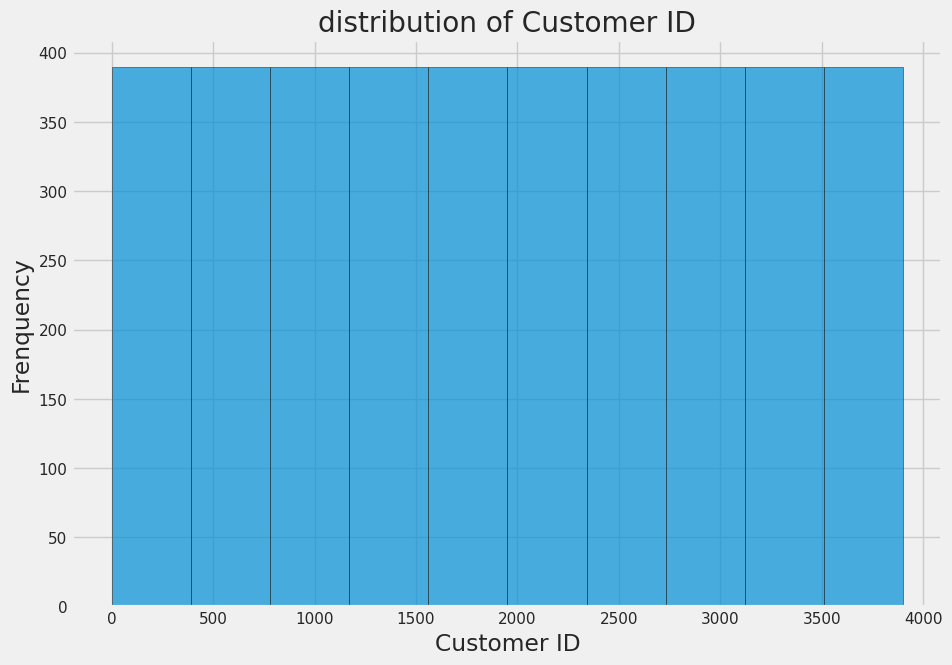

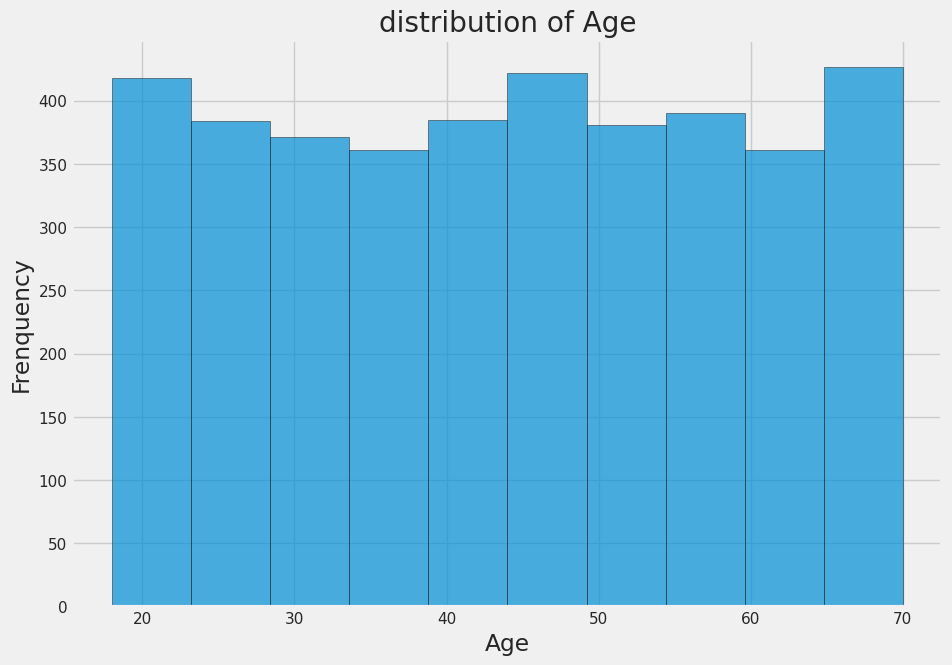

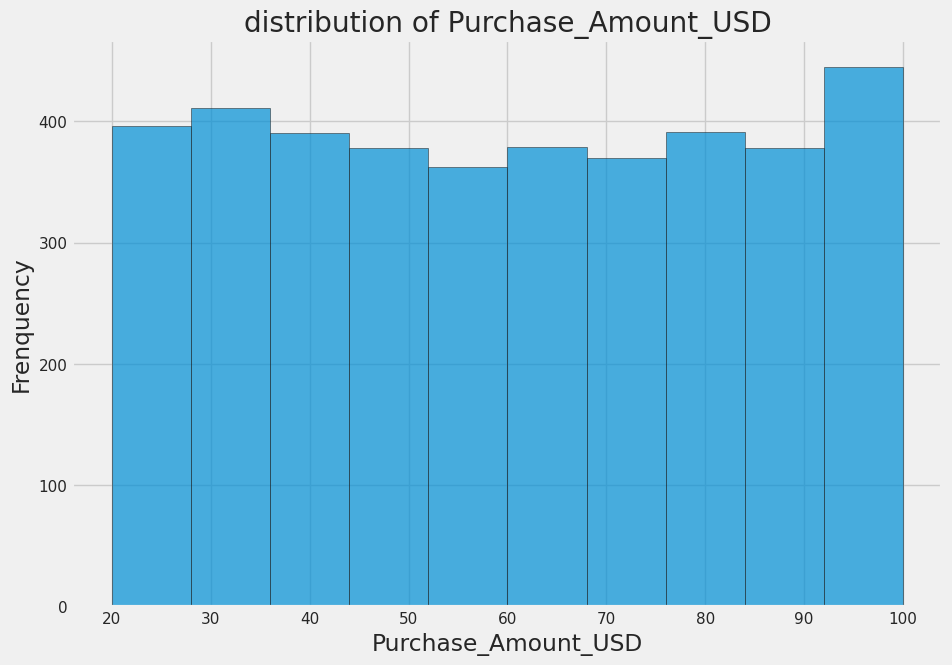

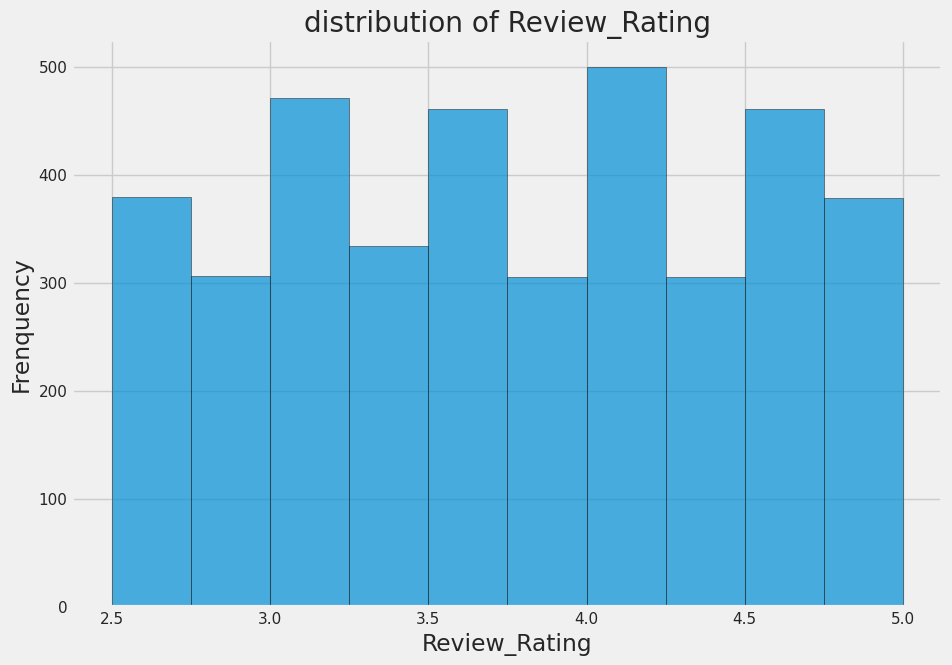

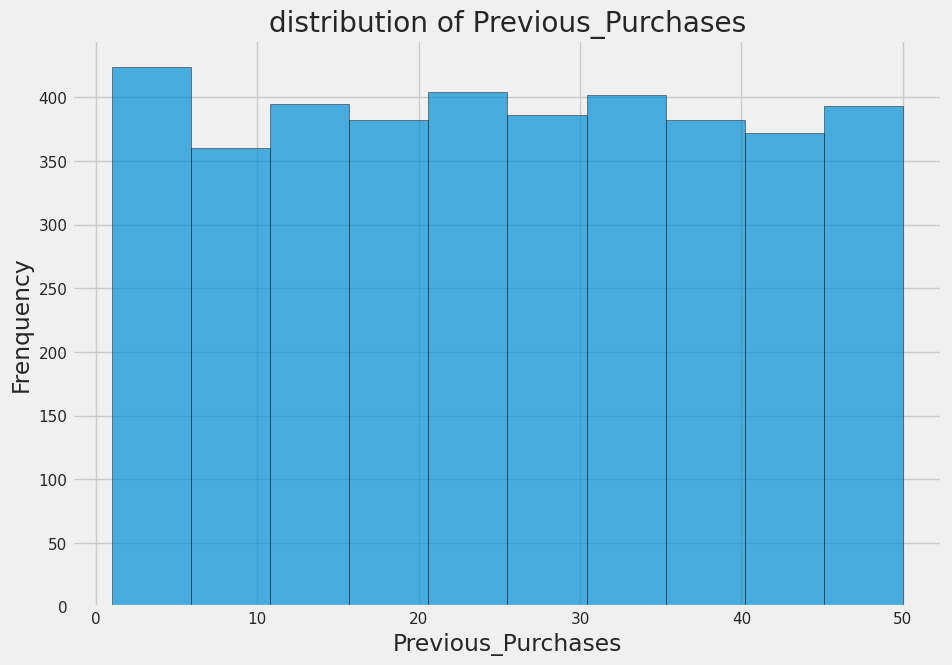

In [ ]:
 #Trực quan tất cả các attribute để tìm outliers
numeric_cols= data.select_dtypes(include=[np.number]).columns
for column in numeric_cols :
    plt.figure(figsize=(10,7))
    plt.hist(data[column], edgecolor ='k',alpha=0.7)
    plt.title(f'distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frenquency')
    plt.grid(True)
    plt.show()
  # dữ liệu không có outliers

# Phân tích đơn biến trên cột số

In [ ]:
data['Age'].describe()

count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64

In [ ]:
data['Age']

0       55
1       19
2       50
3       21
4       45
        ..
3895    40
3896    52
3897    46
3898    44
3899    52
Name: Age, Length: 3900, dtype: int64

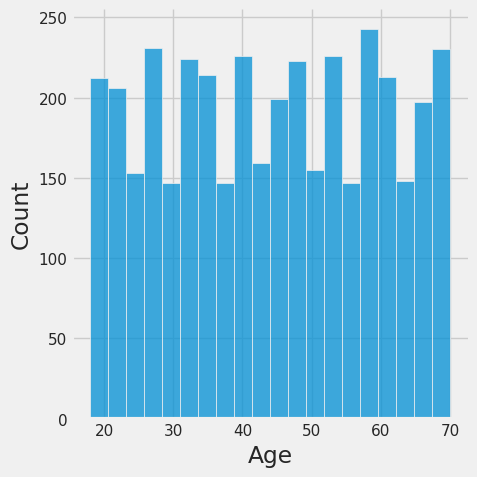

In [ ]:
sns.displot(data=data,x='Age',kind='hist',bins=20)


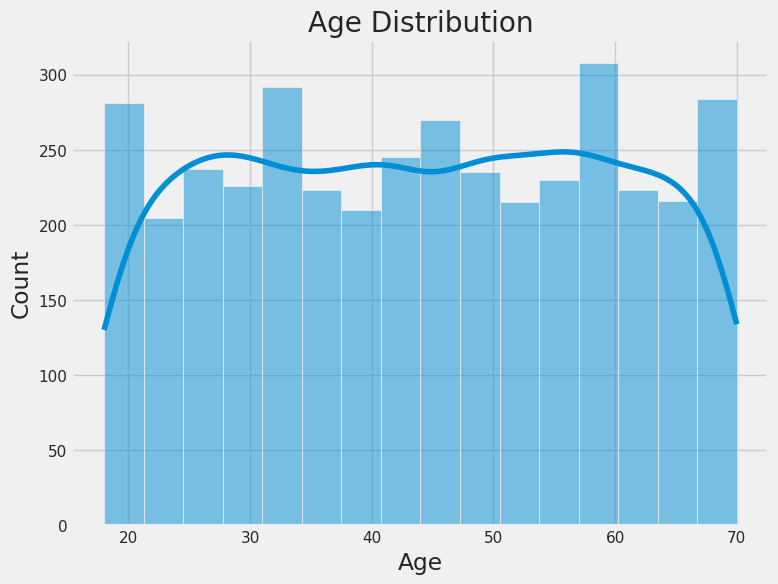

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', kde=True)
plt.title('Age Distribution')
plt.show()

In [ ]:
data['Age'].skew()

-0.0063797217209905395

<Axes: >

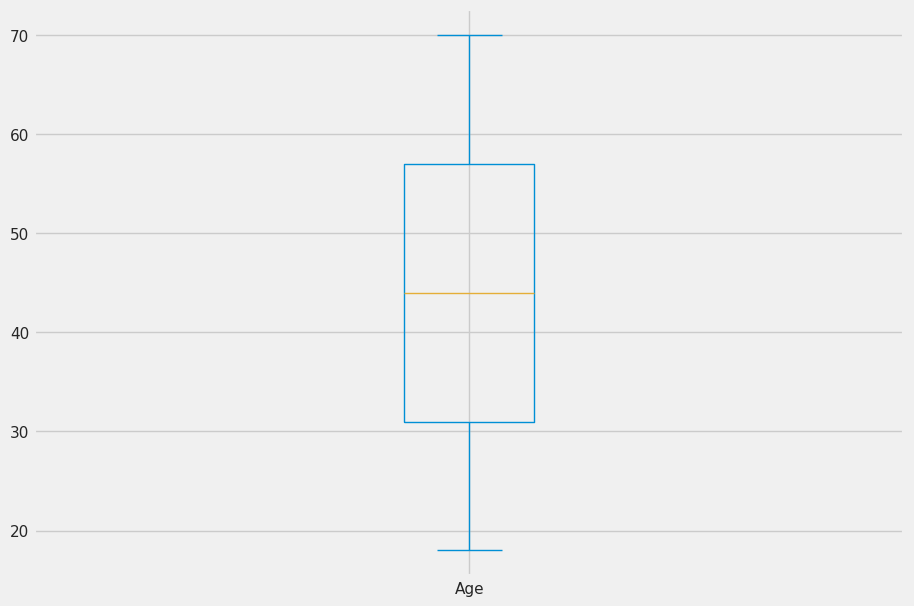

In [ ]:
plt.figure(figsize=(10,7))
data['Age'].plot(kind='box')
# độ tuổi trung bình khoảng 44 tuổi

Kết luận tuổi
1. Tuổi gần như có phân bố chuẩn (phân bố đối xứng)
2. Không có outliers

In [ ]:
data['Purchase_Amount_USD'].describe()

count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase_Amount_USD, dtype: float64

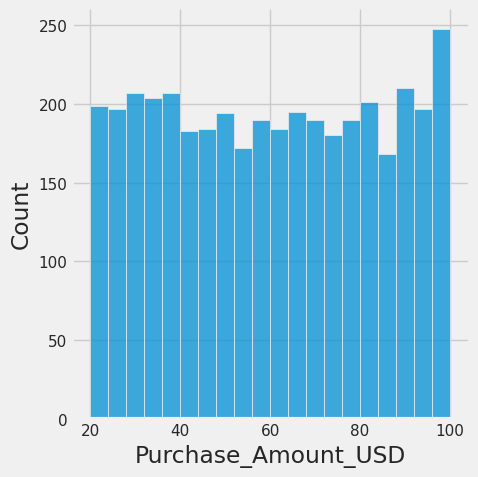

In [ ]:
sns.displot(data=data,x='Purchase_Amount_USD',kind='hist',bins=20)

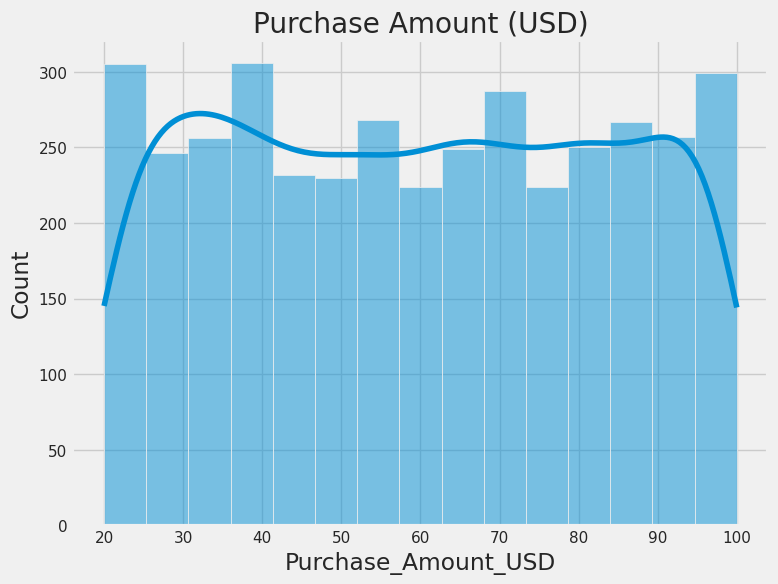

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Purchase_Amount_USD', kde=True)
plt.title('Purchase Amount (USD)')
plt.show()

In [ ]:
data['Purchase_Amount_USD'].skew()
# dữ liệu có phân bố chuẩn

0.012701757626433795

<Axes: >

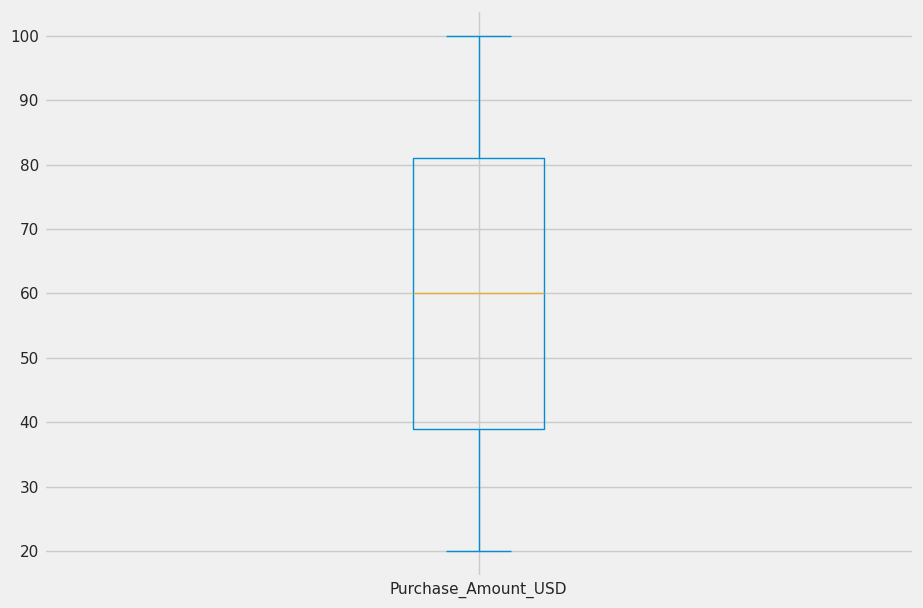

In [ ]:
plt.figure(figsize=(10,7))
data['Purchase_Amount_USD'].plot(kind='box')

In [ ]:
data['Review_Rating'].describe()

count    3900.000000
mean        3.749949
std         0.716223
min         2.500000
25%         3.100000
50%         3.700000
75%         4.400000
max         5.000000
Name: Review_Rating, dtype: float64

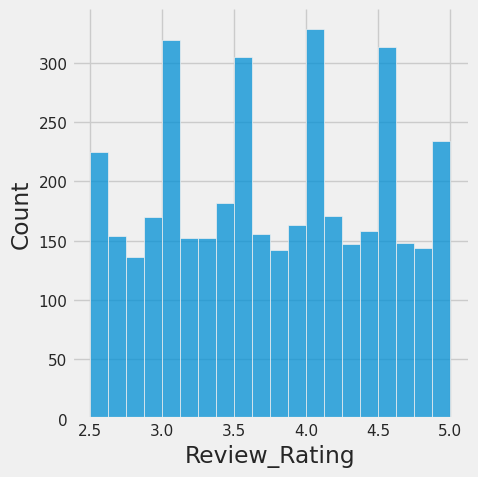

In [ ]:
sns.displot(data=data,x='Review_Rating',kind='hist',bins=20)

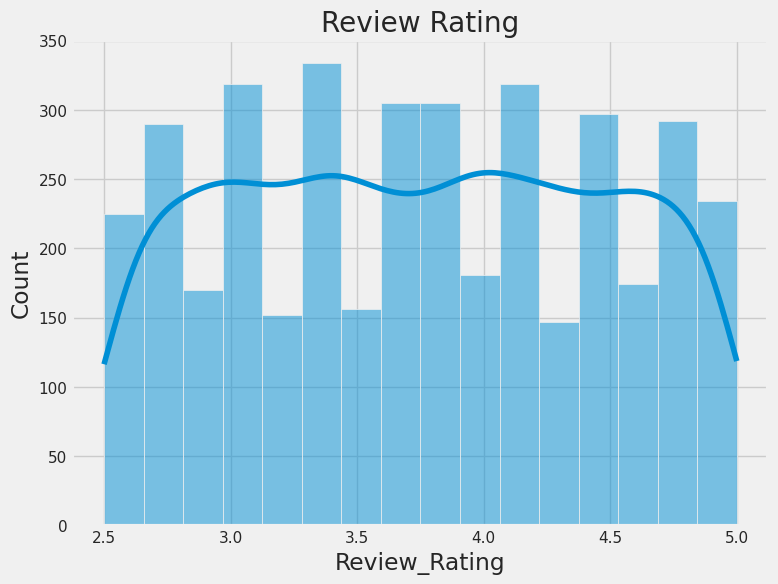

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Review_Rating', kde=True)
plt.title('Review Rating')
plt.show()

In [ ]:
data['Review_Rating'].skew()

0.00452459644246527

<Axes: >

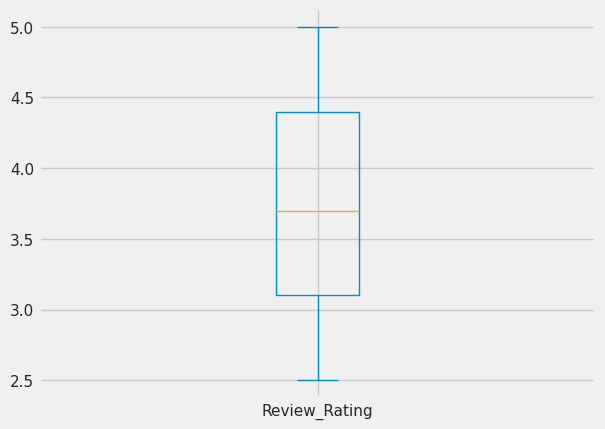

In [ ]:
data['Review_Rating'].plot(kind='box')

In [ ]:
data['Previous_Purchases'].describe

<bound method NDFrame.describe of 0       14
1        2
2       23
3       49
4       31
        ..
3895    32
3896    41
3897    24
3898    24
3899    33
Name: Previous_Purchases, Length: 3900, dtype: int64>

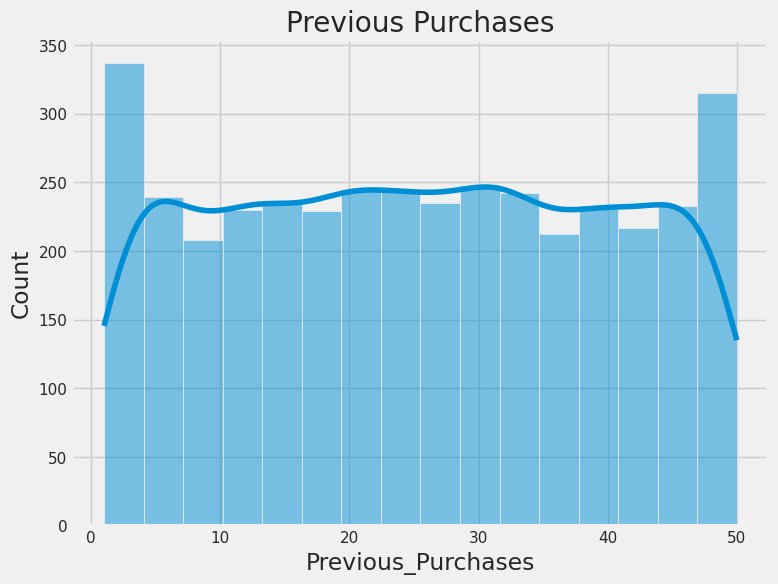

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Previous_Purchases', kde=True)
plt.title('Previous Purchases')
plt.show()

In [ ]:
data['Previous_Purchases'].skew()

0.0031211555127652127

<Axes: >

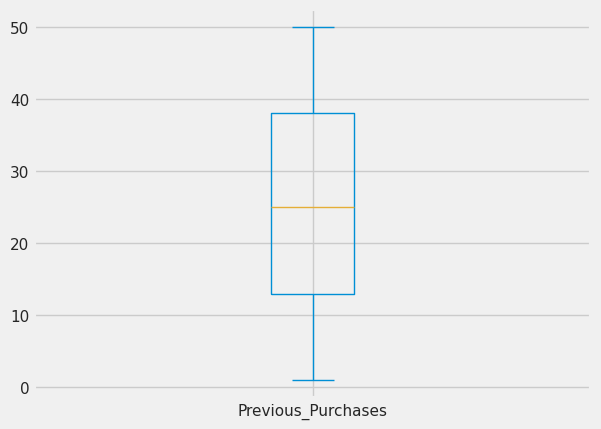

In [ ]:
data['Previous_Purchases'].plot(kind='box')

phân bố chuẩn (phân bố đối xứng)
dữ liệu các cột Numerical
1. đã chuẩn hoá
2.phân bố chuẩn (phân bố đối xứng)


## Phân tích đơn biến trên các cột phân loại(categorical )




<Axes: xlabel='Subscription_Status', ylabel='count'>

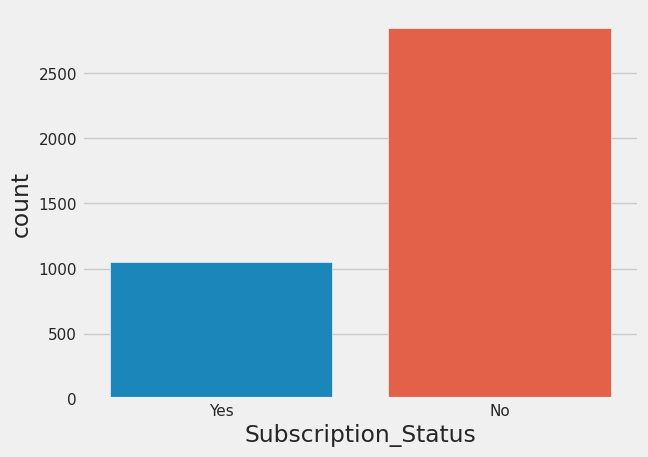

In [ ]:
sns.countplot(x='Subscription_Status',data=data)

<Axes: xlabel='Gender', ylabel='count'>

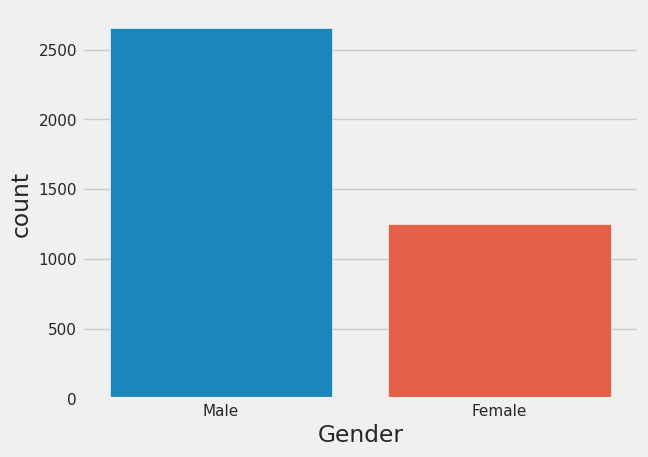

In [ ]:
sns.countplot(x='Gender',data=data)

In [ ]:
Gender_count = data['Gender'].value_counts()
print('number of male',Gender_count['Male'])
print('number of Female',Gender_count['Female'])


number of male 2652
number of Female 1248


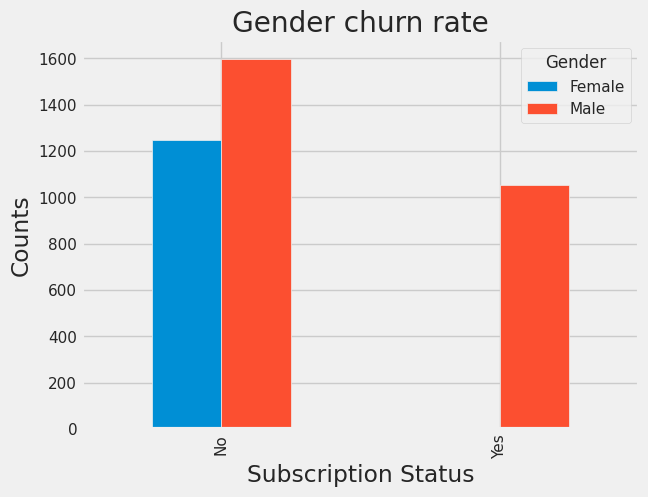

In [ ]:
# Tính tổng số lượng đằng kí hay không đăng kí mua hàng theo theo nam / nữ
Gender_churn_crosstab= pd.crosstab(data['Subscription_Status'],data['Gender'])
total_count= Gender_churn_crosstab.sum(axis=0)
ax=Gender_churn_crosstab.plot(kind='bar')
plt.xlabel('Subscription Status')
plt.ylabel('Counts')
plt.legend(title='Gender')
plt.title('Gender churn rate')
plt.show()
# lượng không đăng kí rất nhiều và nhóm nữ không có đăng kí dịch vụ mua hàng

<Axes: xlabel='Subscription_Status', ylabel='Age'>

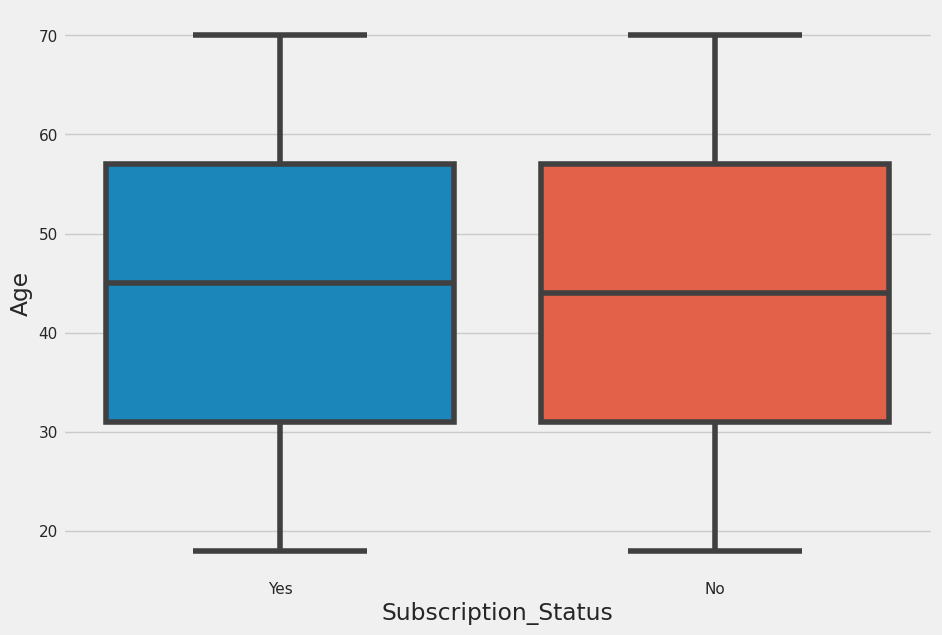

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data,x='Subscription_Status',y='Age')
# dựa vào biểu đò ta có thể thấy được  độ tuổi trung bình của những người đăng kí là 45 so với 44 của những người không đăng kí dịch vụ mua hàng
# nhưng nhìn tổng thể thì khách hàng có hoặc không đăng kí dịch vụ mua hàng thì họ đều trong khoảng độ tuổi từ 30 đến 60

Text(0.5, 1.0, 'Gender')

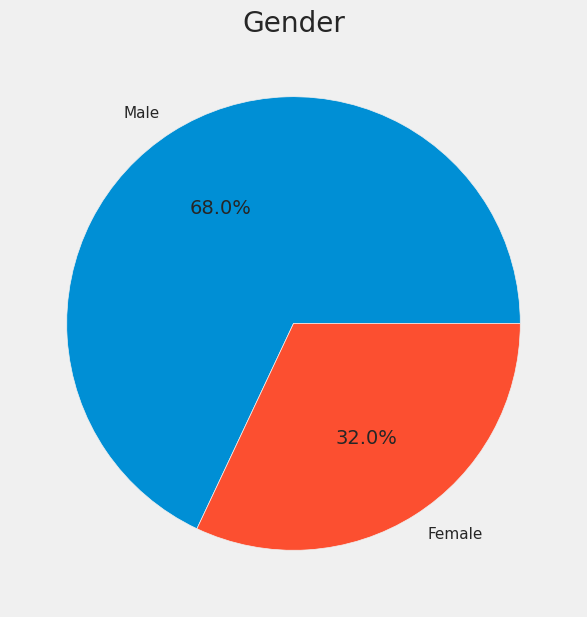

In [ ]:
plt.figure(figsize=(10,7))
counts=data['Gender'].value_counts()
plt.pie(counts,labels=counts.index, autopct='%1.1f%%')
plt.title('Gender')

In [ ]:
data['Category'].value_counts()

Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64

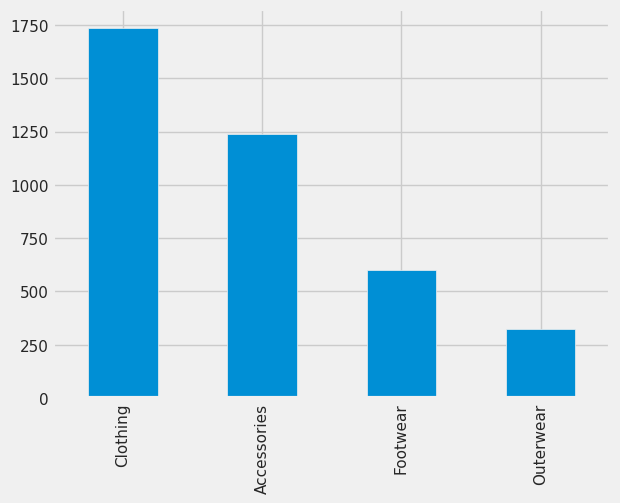

In [ ]:
data['Category'].value_counts().plot(kind='bar')
plt.show()

Text(0.5, 1.0, 'Category')

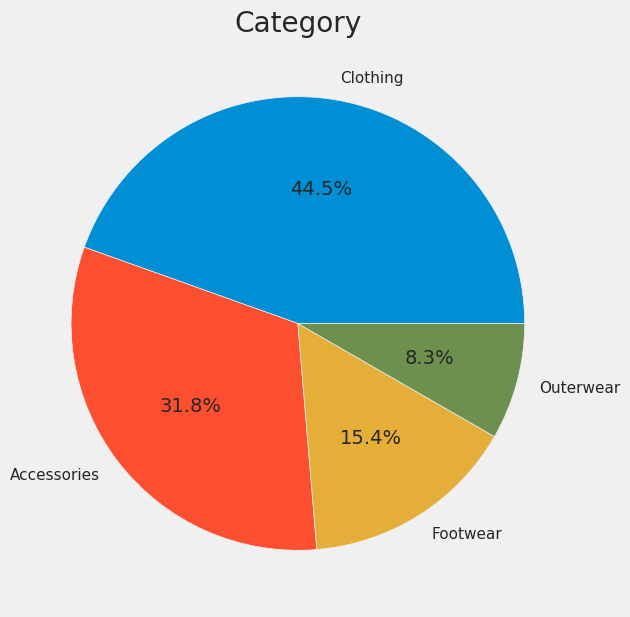

In [ ]:
plt.figure(figsize=(10,7))
Cate_counts=data['Category'].value_counts()
plt.pie(Cate_counts,labels=Cate_counts.index, autopct='%1.1f%%')
plt.title('Category')

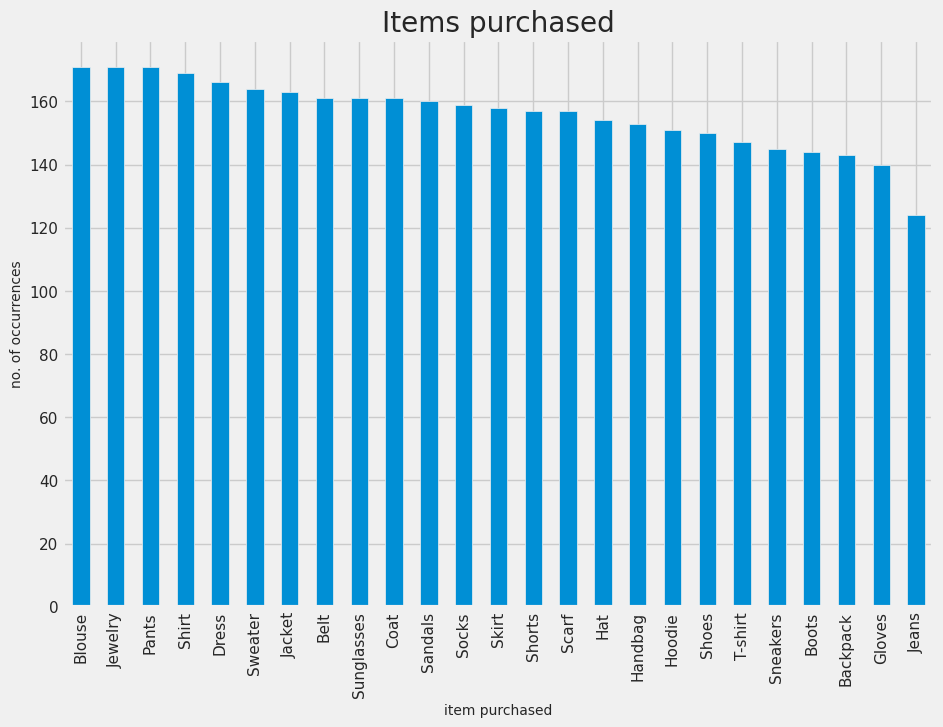

In [ ]:
plt.figure(figsize=(10,7))
data['Item_Purchased'].value_counts().plot(kind='bar')
plt.title('Items purchased')
plt.ylabel('no. of occurrences',fontsize=10)
plt.xlabel('item purchased',fontsize=10)
plt.show()

In [ ]:
data['Item_Purchased'].mode()[0]
# áo cánh (Blouse) sản phẩm mua nhiều nhất

'Blouse'

<ipython-input-437-4648dfc627a3>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=data,y=data['Previous_Purchases'].value_counts(),x='Item_Purchased',ci=False)


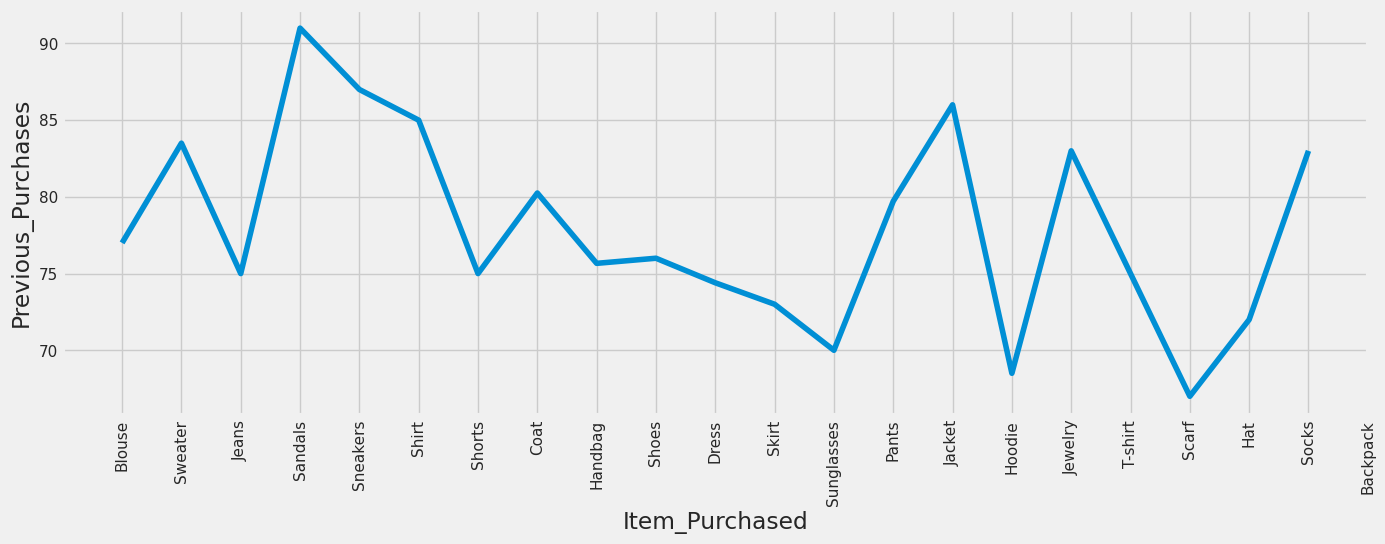

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data,y=data['Previous_Purchases'].value_counts(),x='Item_Purchased',ci=False)
plt.xticks(rotation=90)
plt.show();

<ipython-input-439-5d27101c8eeb>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=data,y='Previous_Purchases',x='Item_Purchased',hue='Gender',ci=False)


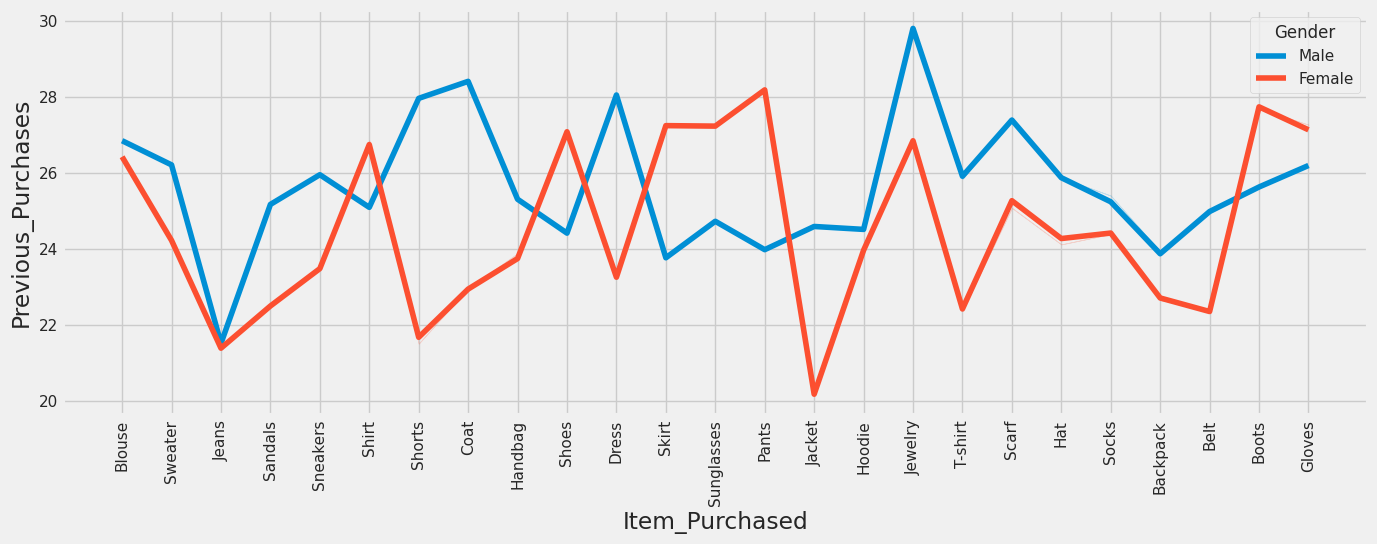

In [ ]:
# trending items between male and females
plt.figure(figsize=(15,5))
sns.lineplot(data=data,y='Previous_Purchases',x='Item_Purchased',hue='Gender',ci=False)
plt.xticks(rotation=90)
plt.show();

In [ ]:
data['Location'].value_counts()

Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Arizona      

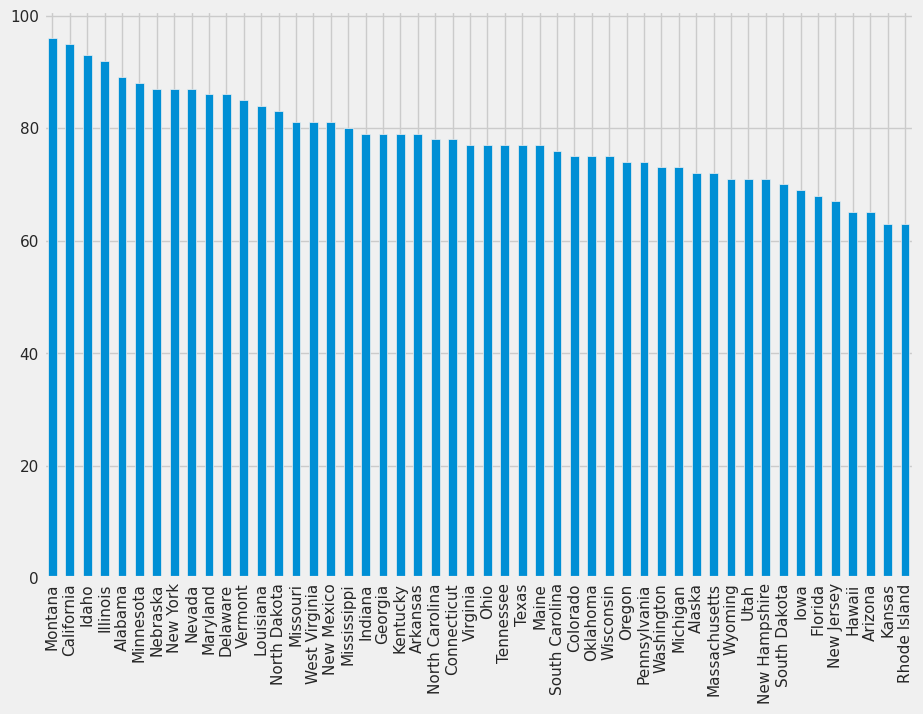

In [ ]:
plt.figure(figsize = (10, 7))
data['Location'].value_counts().plot(kind='bar')
plt.show()

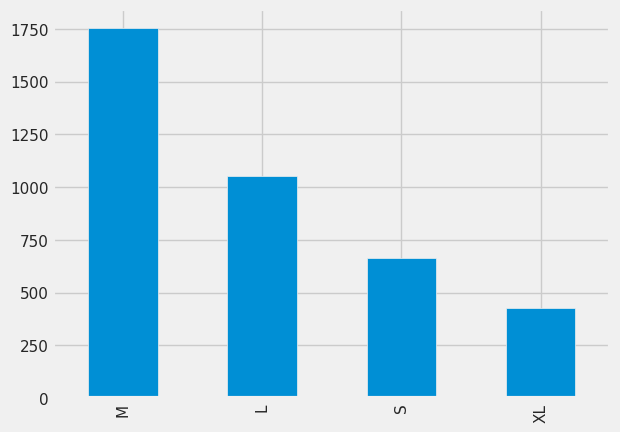

In [ ]:
data["Size"].value_counts().plot(kind='bar')
plt.show()

In [ ]:
data["Season"].value_counts()

Spring    999
Fall      975
Winter    971
Summer    955
Name: Season, dtype: int64

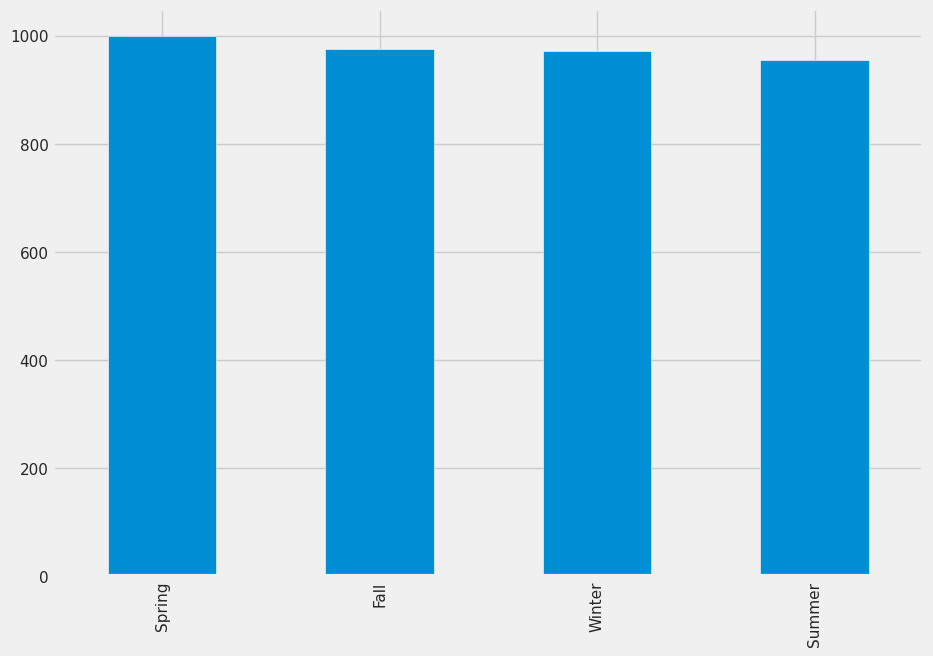

In [ ]:
plt.figure(figsize = (10, 7))
data['Season'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
data['Payment_Method'].value_counts()

PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: Payment_Method, dtype: int64

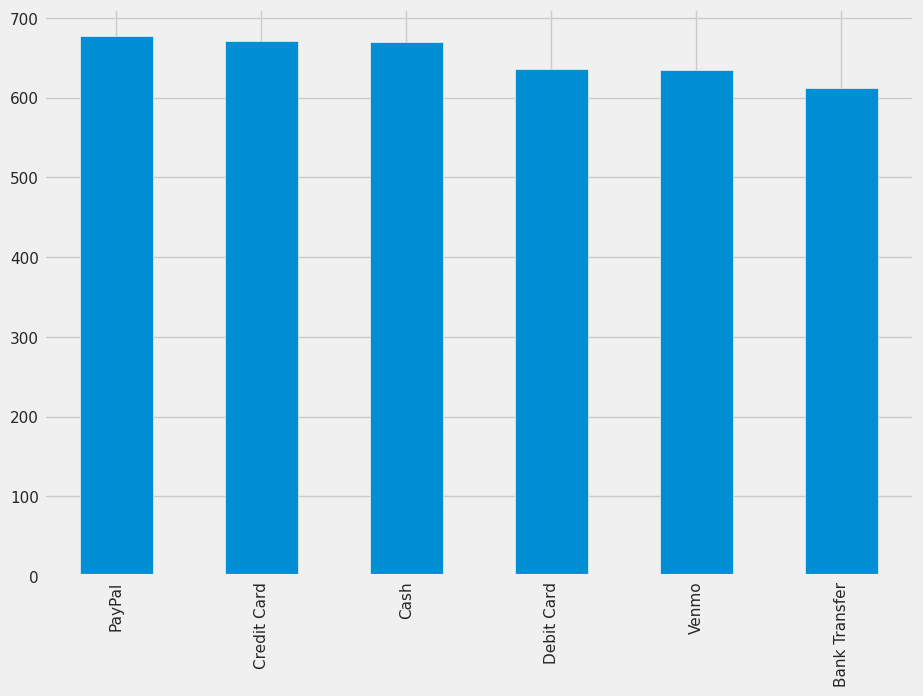

In [ ]:
plt.figure(figsize = (10, 7))
data['Payment_Method'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
data["Shipping_Type"].value_counts()

Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: Shipping_Type, dtype: int64

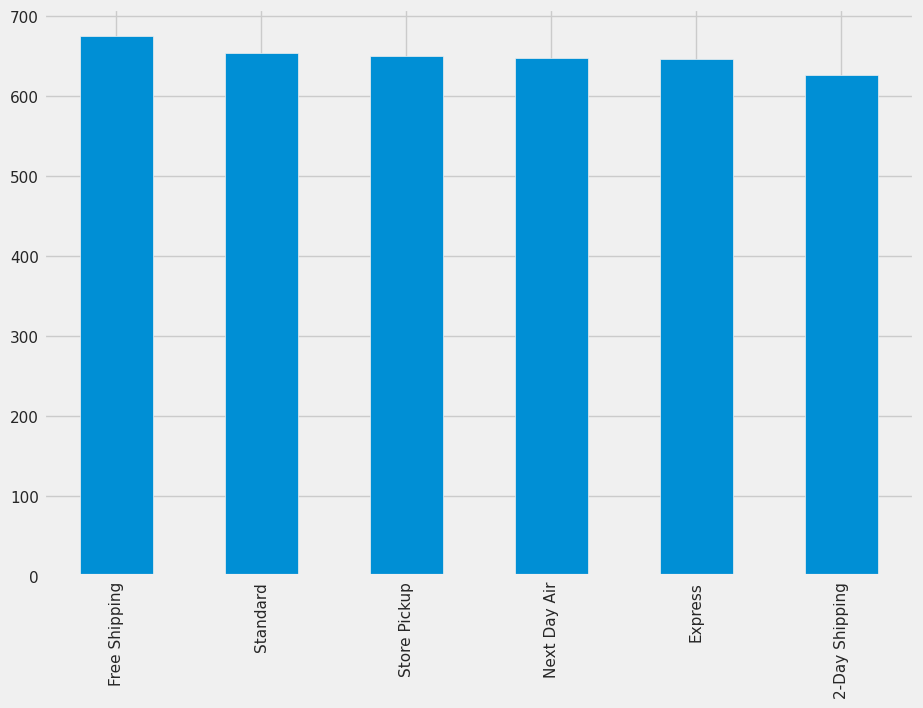

In [ ]:
plt.figure(figsize = (10, 7))
data['Shipping_Type'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
data["Frequency_of_Purchases"].value_counts()

Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: Frequency_of_Purchases, dtype: int64

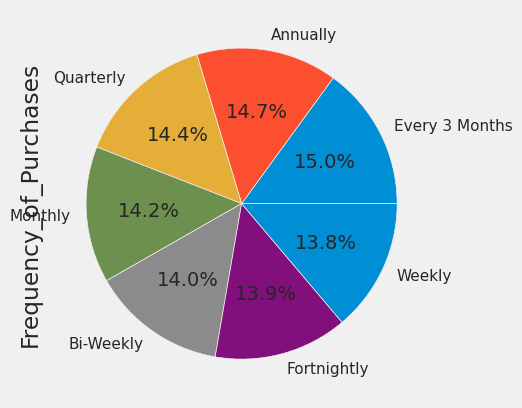

In [ ]:
data["Frequency_of_Purchases"].value_counts().plot(kind="pie",autopct='%0.1f%%')
plt.show()

In [ ]:
data.groupby('Category')['Purchase_Amount_USD'].sum()
# danh thu mỗi sản phẩm . quần áo (Clothing) có doanh thu cao nhất

Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase_Amount_USD, dtype: int64

In [ ]:
data.groupby('Gender')['Review_Rating'].mean()
#Đánh giá trung bình của khách hàng nam và khách hàng nữ  gần như bằng nhau

Gender
Female    3.741426
Male      3.753959
Name: Review_Rating, dtype: float64

In [ ]:
data['Payment_Method'].mode()[0]
# PayPal là hình thưc thanh toán được dùng nhiều nhất

'PayPal'

In [ ]:
data[data['Subscription_Status'] == 'Yes'].shape[0]
#lượng khách đăng kí dịch vụ mua hàng

1053

In [ ]:
avg_purchase_subscription_yes = data[data['Subscription_Status'] == 'Yes']['Purchase_Amount_USD'].mean()
avg_purchase_subscription_no = data[data['Subscription_Status'] == 'No']['Purchase_Amount_USD'].mean()
print("Average Purchase Amount for Subscription 'Yes':", avg_purchase_subscription_yes)
print("Average Purchase Amount for Subscription 'No':", avg_purchase_subscription_no)
#số tiền trung bình khách hàng đăng kí mua và không đăng kí mua gần như bằng nhau nhưng ở không đăng kí lại nhiều hơn một chút

Average Purchase Amount for Subscription 'Yes': 59.49192782526116
Average Purchase Amount for Subscription 'No': 59.865121180189675


In [ ]:
data['Season'].mode()[0]
# Mùa xuân được nhiều người mua hàng nhất

'Spring'

In [ ]:
data.groupby('Gender')['Purchase_Amount_USD'].sum()
# nhóm đàn ông mua hàng nhiều hơn nữ gần gấp đôi

Gender
Female     75191
Male      157890
Name: Purchase_Amount_USD, dtype: int64

In [ ]:
data[data['Promo_Code_Used'] == 'Yes'].shape[0]



1677

In [ ]:
data[data['Promo_Code_Used'] == 'No'].shape[0]
#khách hàng  không sử dụng dịch vụ khuyến mãi cao hơn với người dùng dịch vụ

2223

In [ ]:
data[(data['Gender'] == 'Female') & (data['Review_Rating'] < 3)]['Category'].mode()[0]

'Clothing'

In [ ]:
data[(data['Gender'] == 'Male') & (data['Review_Rating'] < 3)]['Category'].mode()[0]
# danh muc 'Clothing' được đánh giá dưới 3 nhiều nhất của cả nam và nữ đều như nhau

'Clothing'

In [ ]:
data.groupby('Location')['Purchase_Amount_USD'].sum()
# doanh thu theo khu vực. tất cả khu vực đều có doanh thu khá cao và đồng đều

Location
Alabama           5261
Alaska            4867
Arizona           4326
Arkansas          4828
California        5605
Colorado          4222
Connecticut       4226
Delaware          4758
Florida           3798
Georgia           4645
Hawaii            3752
Idaho             5587
Illinois          5617
Indiana           4655
Iowa              4201
Kansas            3437
Kentucky          4402
Louisiana         4848
Maine             4388
Maryland          4795
Massachusetts     4384
Michigan          4533
Minnesota         4977
Mississippi       4883
Missouri          4691
Montana           5784
Nebraska          5172
Nevada            5514
New Hampshire     4219
New Jersey        3802
New Mexico        5014
New York          5257
North Carolina    4742
North Dakota      5220
Ohio              4649
Oklahoma          4376
Oregon            4243
Pennsylvania      4926
Rhode Island      3871
South Carolina    4439
South Dakota      4236
Tennessee         4772
Texas             4712
Ut

# Feature Engineering (dự báo tình trạng đăng kí mua hàng)



In [ ]:
f = ['Age', 'Gender', 'Item_Purchased', 'Category',
       'Purchase_Amount_USD', 'Location', 'Size', 'Color', 'Season',
       'Review_Rating', 'Subscription_Status', 'Shipping_Type',
       'Discount_Applied', 'Promo_Code_Used', 'Previous_Purchases',
       'Payment_Method', 'Frequency_of_Purchases']

<ipython-input-338-efb6b10502cf>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=data,x=i,y='Customer ID',ci=False)
<ipython-input-338-efb6b10502cf>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=data,x=i,y='Customer ID',ci=False)
<ipython-input-338-efb6b10502cf>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=data,x=i,y='Customer ID',ci=False)
<ipython-input-338-efb6b10502cf>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=data,x=i,y='Customer ID',ci=False)
<ipython-input-338-efb6b10502cf>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=data,x=i,y='Customer ID',ci=False)
<ipython-input-338-efb6b10502cf>:6:

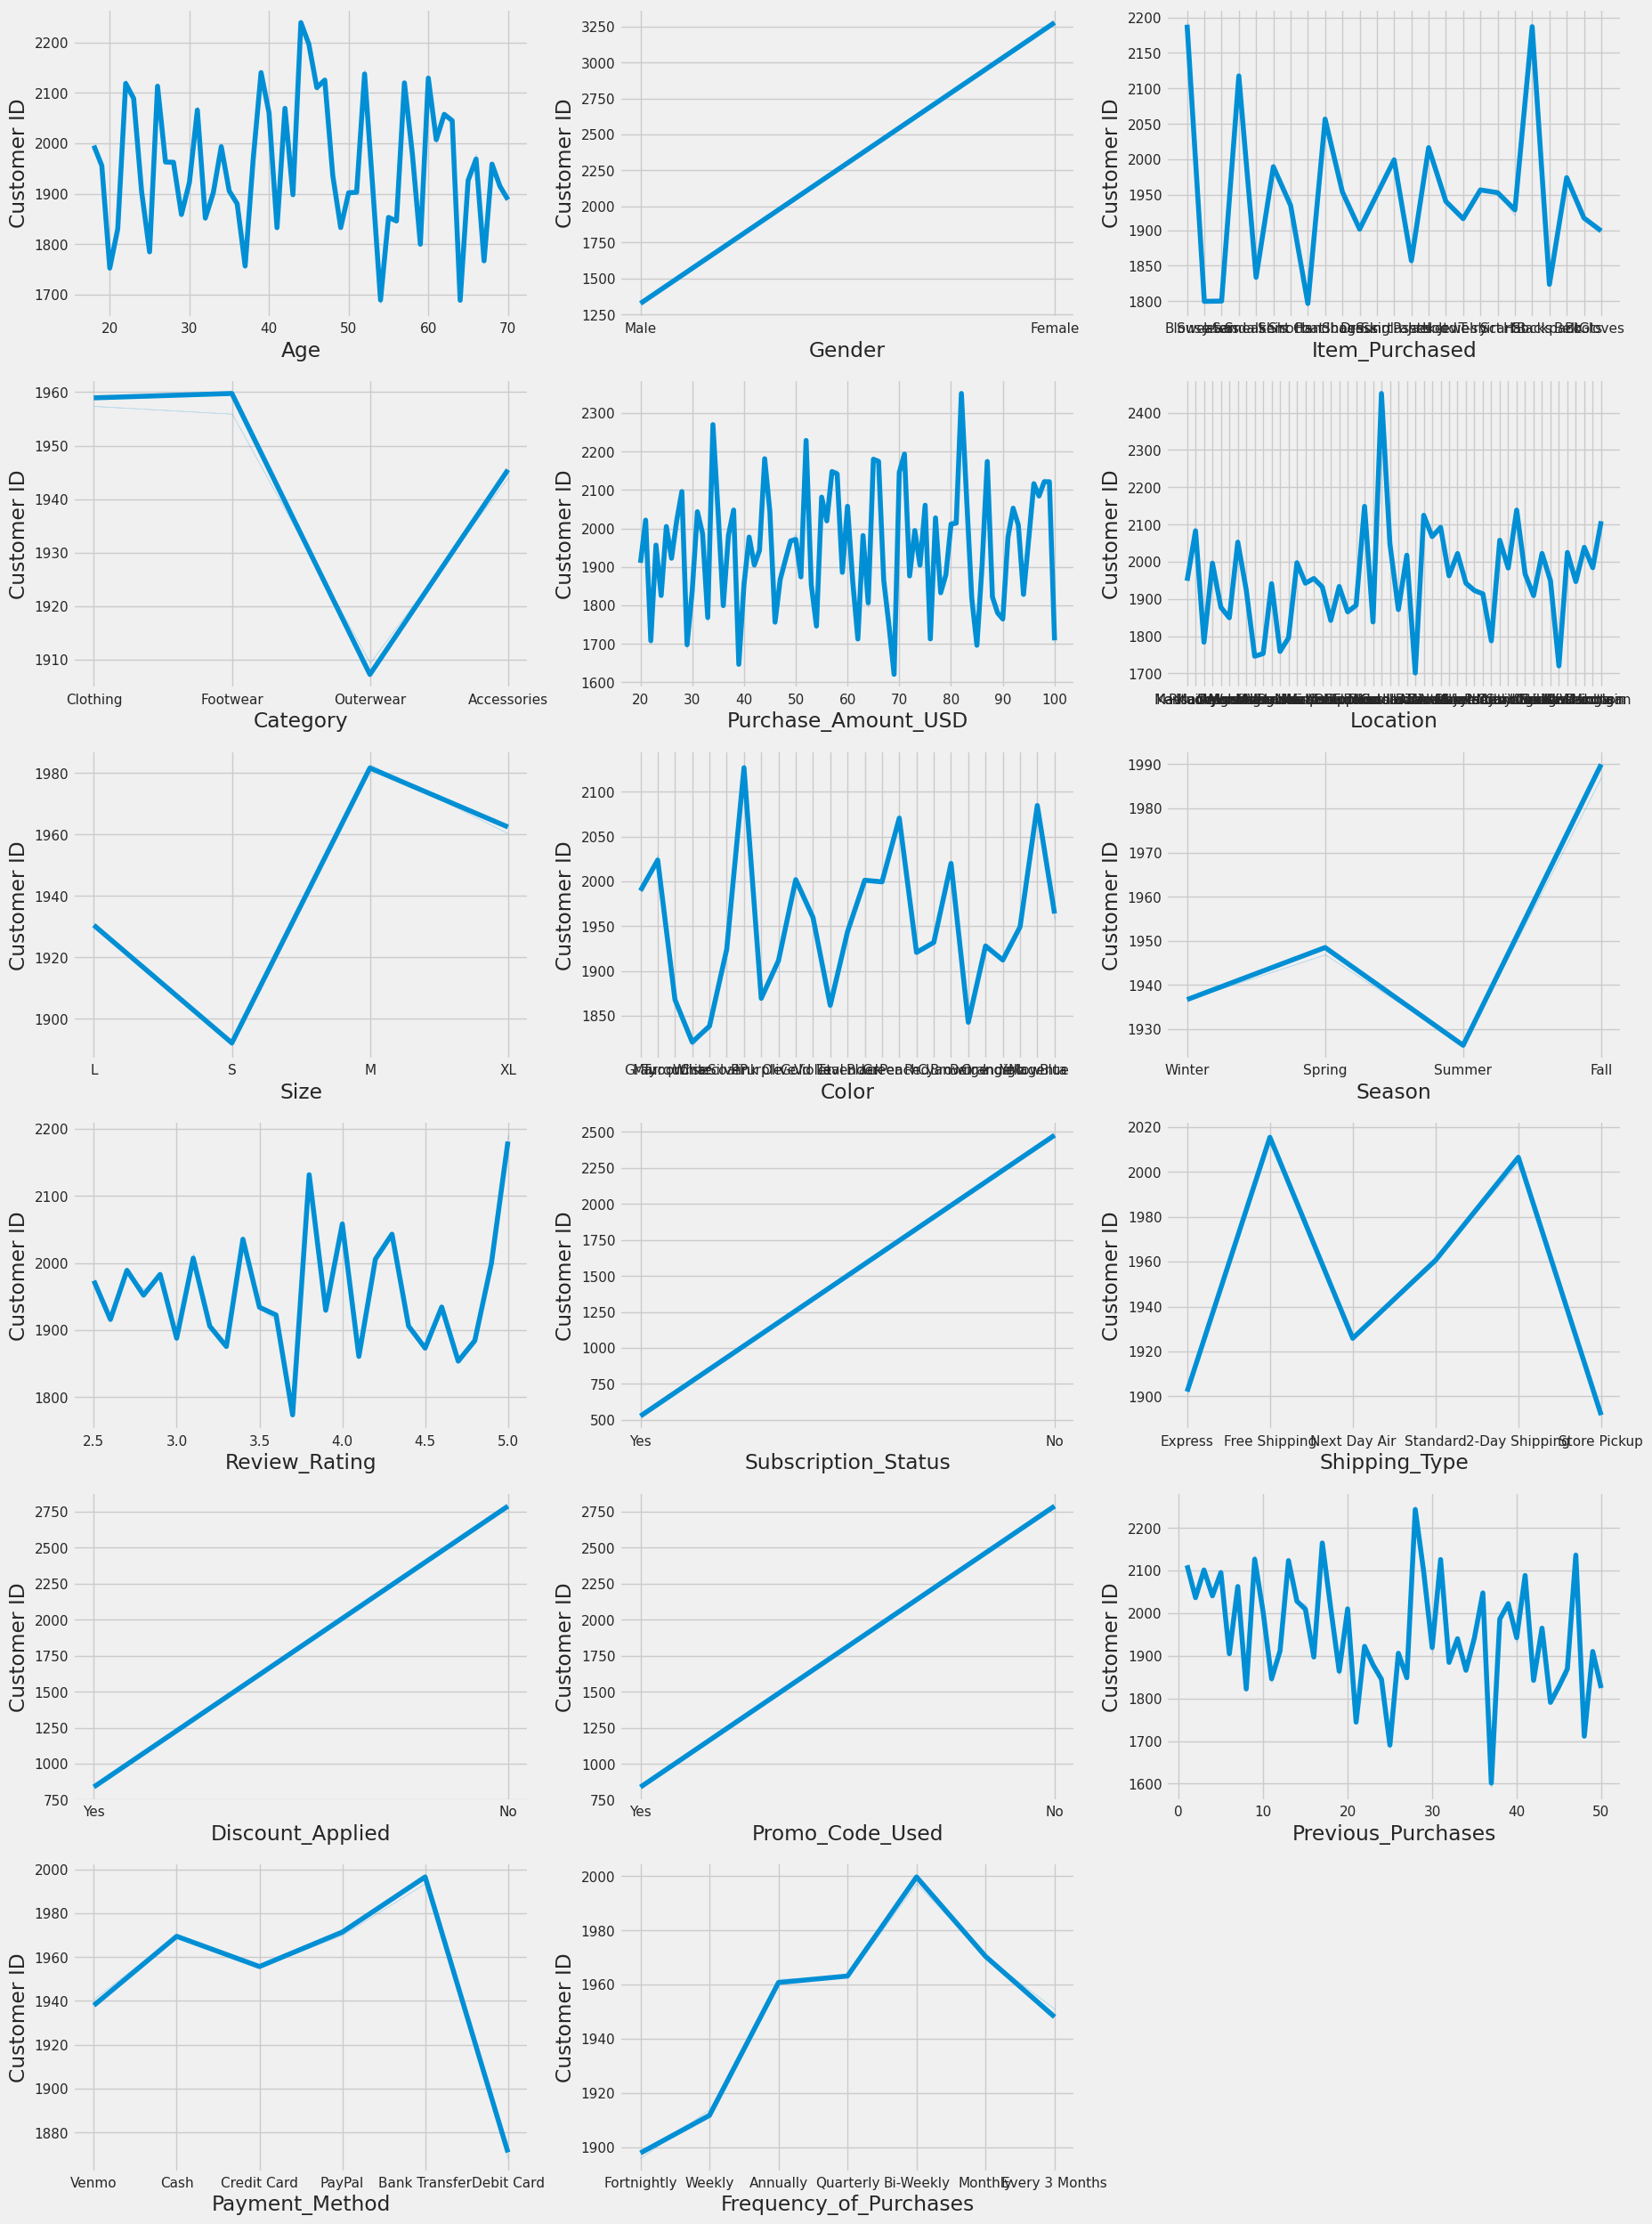

In [ ]:
#Hiển thị sơ đồ đường giữa ID khách hàng và tất cả các cột khác trong tập dữ liệu
pno = 1
plt.figure(figsize=(20,30))
for i in f:
    plt.subplot(6,3,pno)
    sns.lineplot(data=data,x=i,y='Customer ID',ci=False)
    pno += 1

In [ ]:
data.head()

Customer ID  Age Gender Item_Purchased  Category  Purchase_Amount_USD  \
0            1   55   Male         Blouse  Clothing                   53   
1            2   19   Male        Sweater  Clothing                   64   
2            3   50   Male          Jeans  Clothing                   73   
3            4   21   Male        Sandals  Footwear                   90   
4            5   45   Male         Blouse  Clothing                   49   

        Location Size      Color  Season  Review_Rating Subscription_Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping_Type Discount_Applied Promo_Code_Used  Previous_Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment_Method Frequency_of_Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

In [ ]:
#thực hiện mã hóa biến phân loại (categorical variable) "Gender" thành các biến giả (dummy variables) trong tập dữ liệu data.
data1=data
data1=pd.get_dummies(data1,columns=['Gender'])
data1.head()

Customer ID  Age Item_Purchased  Category  Purchase_Amount_USD  \
0            1   55         Blouse  Clothing                   53   
1            2   19        Sweater  Clothing                   64   
2            3   50          Jeans  Clothing                   73   
3            4   21        Sandals  Footwear                   90   
4            5   45         Blouse  Clothing                   49   

        Location Size      Color  Season  Review_Rating Subscription_Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping_Type Discount_Applied Promo_Code_Used  Previous_Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment_Method Frequency_of_Purchases  Gender_Female  Gender_Male  
0          Venmo            Fortnightly              0            1  
1           Cash            Fortnightly              0            1  
2    Credit Card                 Weekly              0            1  
3         PayPal                 Weekly              0            1  
4         PayPal               Annually              0            1

In [ ]:
# Vòng lặp để chuyển đổi tất cả các giá trị không phải số thành giá trị số ngoại trừ cột mục tiêu
label_encode= LabelEncoder()
col_list = []
for col in data1.columns:
    if ((data1[col].dtype == 'object') & (col != 'Subscription_Status') ):
        col_list.append(col)

In [ ]:
for i in col_list:
    data1[i]=label_encode.fit_transform(data1[i])

In [ ]:
# Chuyển đổi cột mục tiêu thành giá trị số, tức là Có = 1 và Không = 0
data1['Subscription_Status'] = np.where(data1['Subscription_Status']=='Yes',1,0)

In [ ]:
data1.head()

Customer ID  Age  Item_Purchased  Category  Purchase_Amount_USD  Location  \
0            1   55               2         1                   53        16   
1            2   19              23         1                   64        18   
2            3   50              11         1                   73        20   
3            4   21              14         2                   90        38   
4            5   45               2         1                   49        36   

   Size  Color  Season  Review_Rating  Subscription_Status  Shipping_Type  \
0     0      7       3            3.1                    1              1   
1     0     12       3            3.1                    1              1   
2     2     12       1            3.1                    1              2   
3     1     12       1            3.5                    1              3   
4     1     21       1            2.7                    1              2   

   Discount_Applied  Promo_Code_Used  Previous_Purchases  Payment_Method  \
0                 1                1                  14               5   
1                 1                1                   2               1   
2                 1                1                  23               2   
3                 1                1                  49               4   
4                 1                1                  31               4   

   Frequency_of_Purchases  Gender_Female  Gender_Male  
0                       3              0            1  
1                       3              0            1  
2                       6              0            1  
3                       6              0            1  
4                       0              0            1

In [ ]:
data1.drop(columns='Customer ID',inplace=True)

<Axes: xlabel='Age', ylabel='Purchase_Amount_USD'>

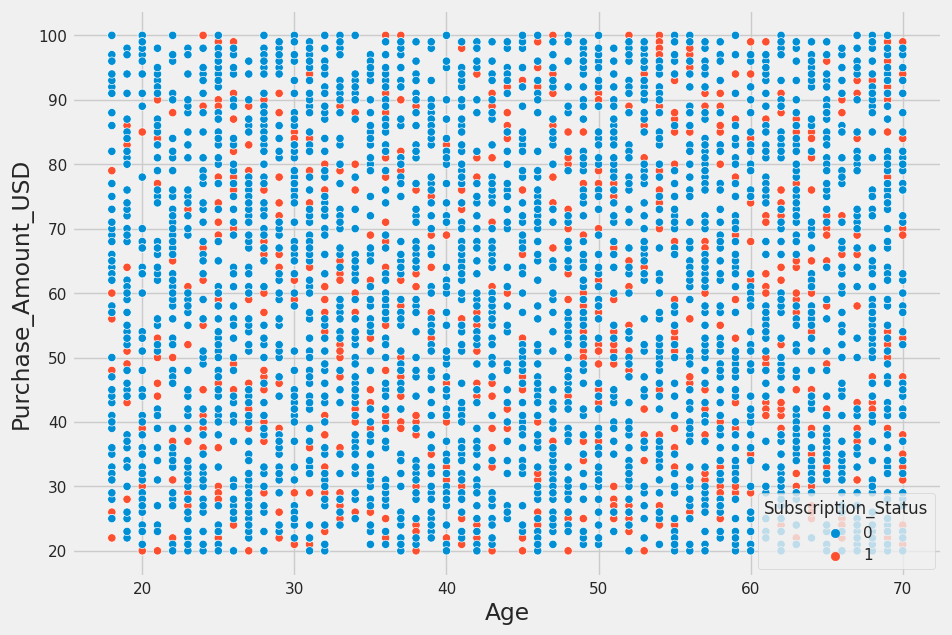

In [ ]:
# Trực quan dữ liệu bằng biểu đồ scatterplot để mô tả biến mục tiêu với 2 biến phụ thuộc
plt.figure(figsize=(10,7))
sns.scatterplot(x=data1['Age'],y=data1['Purchase_Amount_USD'],hue =data1['Subscription_Status'])


<Axes: xlabel='Location', ylabel='Previous_Purchases'>

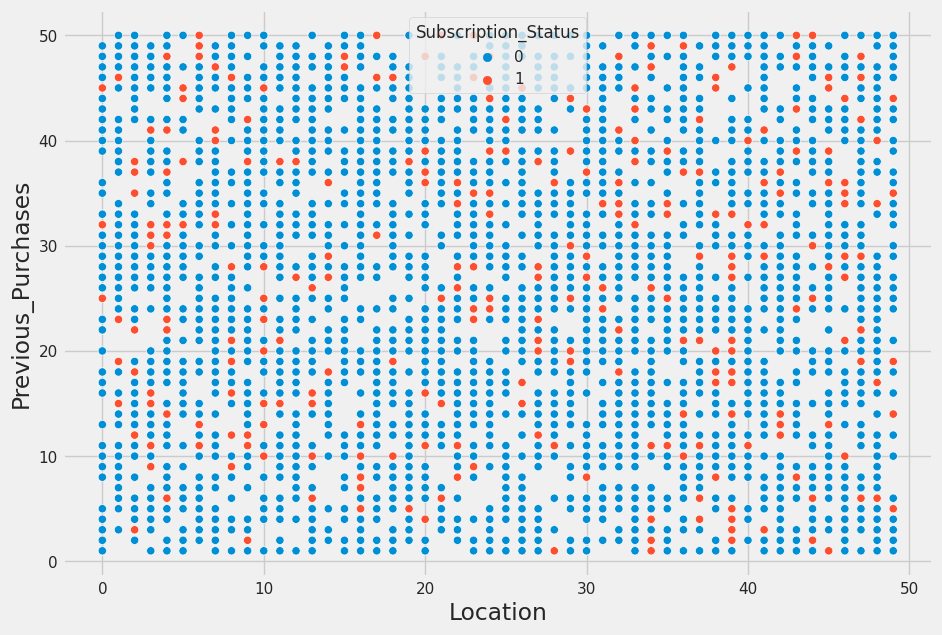

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=data1['Location'],y=data1['Previous_Purchases'],hue =data1['Subscription_Status'])

<Axes: xlabel='Item_Purchased', ylabel='Payment_Method'>

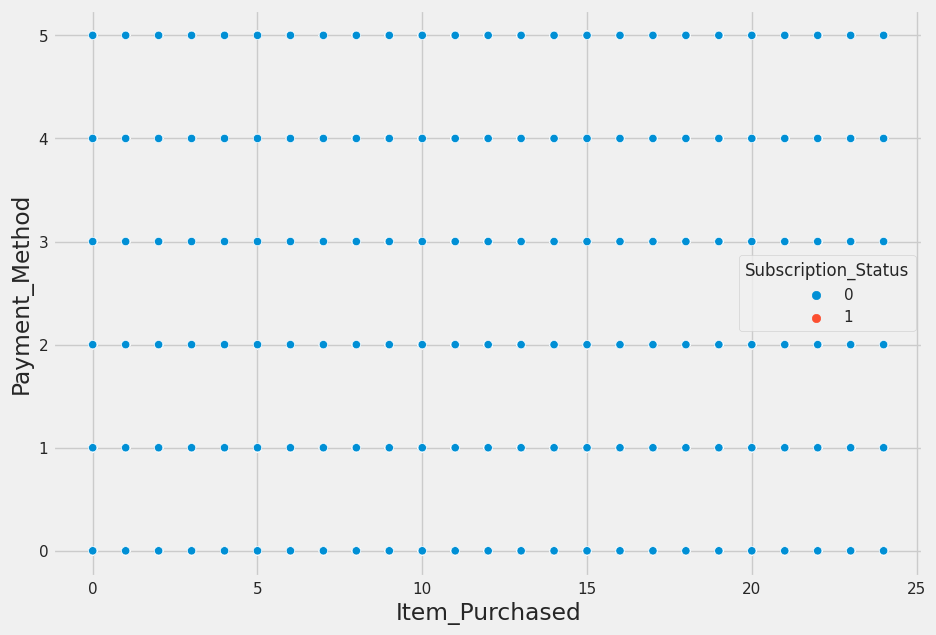

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=data1['Item_Purchased'],y=data1['Payment_Method'],hue =data1['Subscription_Status'])

<Axes: >

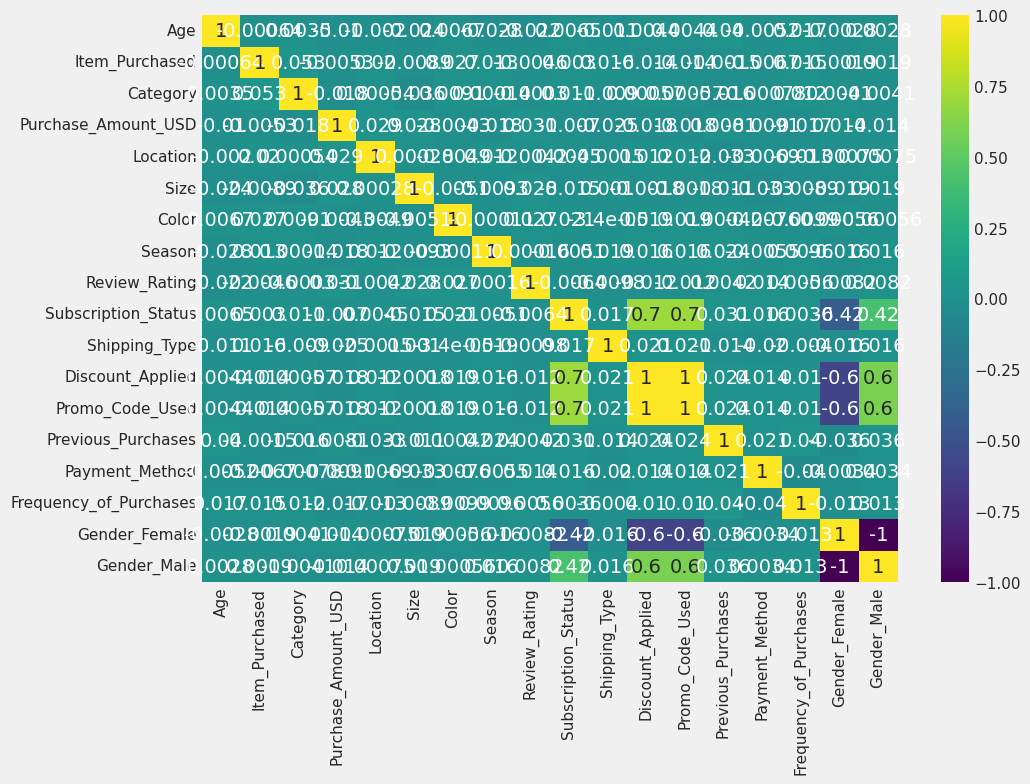

In [ ]:
# Độ tương quan giữa các biến
plt.figure(figsize=(10,7))
sns.heatmap(data1.corr(),annot=True ,cmap='viridis')

# Split dataset into training / testing sets & Normalize (if needed)

In [ ]:
y= data1['Subscription_Status']
feature= data1.columns.difference(['Subscription_Status'])
print(f"feature name :{list(feature)}")
X=data1[feature]


feature name :['Age', 'Category', 'Color', 'Discount_Applied', 'Frequency_of_Purchases', 'Gender_Female', 'Gender_Male', 'Item_Purchased', 'Location', 'Payment_Method', 'Previous_Purchases', 'Promo_Code_Used', 'Purchase_Amount_USD', 'Review_Rating', 'Season', 'Shipping_Type', 'Size']


In [ ]:
X

Age  Category  Color  Discount_Applied  Frequency_of_Purchases  \
0      55         1      7                 1                       3   
1      19         1     12                 1                       3   
2      50         1     12                 1                       6   
3      21         2     12                 1                       6   
4      45         1     21                 1                       0   
...   ...       ...    ...               ...                     ...   
3895   40         1     21                 0                       6   
3896   52         0     23                 0                       1   
3897   46         0      8                 0                       5   
3898   44         2      3                 0                       6   
3899   52         0      0                 0                       5   

      Gender_Female  Gender_Male  Item_Purchased  Location  Payment_Method  \
0                 0            1               2        16               5   
1                 0            1              23        18               1   
2                 0            1              11        20               2   
3                 0            1              14        38               4   
4                 0            1               2        36               4   
...             ...          ...             ...       ...             ...   
3895              1            0               9        45               5   
3896              1            0               0        14               0   
3897              1            0               1        29               5   
3898              1            0              17        22               5   
3899              1            0               7         4               5   

      Previous_Purchases  Promo_Code_Used  Purchase_Amount_USD  Review_Rating  \
0                     14                1                   53            3.1   
1                      2                1                   64            3.1   
2                     23                1                   73            3.1   
3                     49                1                   90            3.5   
4                     31                1                   49            2.7   
...                  ...              ...                  ...            ...   
3895                  32                0                   28            4.2   
3896                  41                0                   49            4.5   
3897                  24                0                   33            2.9   
3898                  24                0                   77            3.8   
3899                  33                0                   81            3.1   

      Season  Shipping_Type  Size  
0          3              1     0  
1          3              1     0  
2          1              2     2  
3          1              3     1  
4          1              2     1  
...      ...            ...   ...  
3895       2              0     0  
3896       1              5     0  
3897       1              4     0  
3898       2              1     2  
3899       1              5     1  

[3900 rows x 17 columns]

In [ ]:
X.head()

Age  Category  Color  Discount_Applied  Frequency_of_Purchases  \
0   55         1      7                 1                       3   
1   19         1     12                 1                       3   
2   50         1     12                 1                       6   
3   21         2     12                 1                       6   
4   45         1     21                 1                       0   

   Gender_Female  Gender_Male  Item_Purchased  Location  Payment_Method  \
0              0            1               2        16               5   
1              0            1              23        18               1   
2              0            1              11        20               2   
3              0            1              14        38               4   
4              0            1               2        36               4   

   Previous_Purchases  Promo_Code_Used  Purchase_Amount_USD  Review_Rating  \
0                  14                1                   53            3.1   
1                   2                1                   64            3.1   
2                  23                1                   73            3.1   
3                  49                1                   90            3.5   
4                  31                1                   49            2.7   

   Season  Shipping_Type  Size  
0       3              1     0  
1       3              1     0  
2       1              2     2  
3       1              3     1  
4       1              2     1

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Subscription_Status, dtype: int64

In [ ]:
print('X',X.size)
print('y',y.size)

X 66300
y 3900


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X,y)

StandardScaler()

In [ ]:
print ("X_train", X_train.size)
print ("X_test", X_test.size)

X_train 53040
X_test 13260


In [ ]:
print ("y_train", y_train.size)
print ("y_test", y_test.size)

y_train 3120
y_test 780


# Training

In [ ]:
# training model Logistic Regression
from sklearn.linear_model import LogisticRegression

logis_model = LogisticRegression(solver='newton-cg', max_iter=500)
logis_model.fit(X_train, y_train)

LogisticRegression(max_iter=500, solver='newton-cg')

In [ ]:
# tìm param n_neighbors (hệ số k)
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
params_Knn = {'n_neighbors':list(np.arange(1,30,1))}
clK = KNeighborsClassifier()
model = GridSearchCV(clK, params_Knn, cv = 10)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 28}

In [ ]:
# training model KNN
from sklearn import neighbors
#  truyền param n_neighbors (hệ số k)
knn_model = neighbors.KNeighborsClassifier(n_neighbors=model.best_params_['n_neighbors'])
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=28)

In [ ]:
# training model naive bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# training model SVM
from sklearn.svm import SVC
svc_model=SVC(probability=True)
svc_model.fit(X_train,y_train)

SVC(probability=True)

In [ ]:
# tìm param cho Random forest
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)


{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# sets of hyperparameters
from sklearn.metrics import accuracy_score
params_rd1 = {'criterion': 'gini', 'max_depth': 10}
params_rd2 = {'criterion': 'entropy',  'max_depth': 10}
model_rd1 = RandomForestClassifier(**params_rd1)
model_rd2 = RandomForestClassifier(**params_rd2)

model_rd1.fit(X_train, y_train)
model_rd2.fit(X_train, y_train)

preds_rd1 = model_rd1.predict(X_test)
preds_rd2 = model_rd2.predict(X_test)

print(f'Accuracy on Model 1: {round(accuracy_score(y_test, preds_rd1), 3)}')
print(f'Accuracy on Model 2: {round(accuracy_score(y_test, preds_rd2), 3)}')



Accuracy on Model 1: 0.822
Accuracy on Model 2: 0.831


In [ ]:
# training model Random Forest
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10,min_samples_split=2,min_samples_leaf=2, random_state=42)
forest_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       random_state=42)

In [ ]:
# sets of hyperparameters Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()
depth = np.arange(1, 30)
leaves = [1, 2, 4, 5, 10, 20, 30, 40, 80, 100]

param_grid_tree = [{'max_depth': depth, 'min_samples_leaf': leaves}]

grid_search_tree = GridSearchCV(estimator=dtc, param_grid=param_grid_tree, scoring='accuracy', cv=10)
grid_search_t = grid_search_tree.fit(X_train, y_train)

best_params_tree = grid_search_t.best_params_
print(best_params_tree)

{'max_depth': 1, 'min_samples_leaf': 1}


In [ ]:
# sets of hyperparameters
from sklearn.metrics import accuracy_score
params_tr1 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 1}
params_tr2 = {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 1}
params_tr3 = {'criterion': 'gini', 'splitter': 'random', 'max_depth': 1}
params_tr4 = {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 1}
model_tr1 = DecisionTreeClassifier(**params_tr1)
model_tr2 = DecisionTreeClassifier(**params_tr2)
model_tr3 = DecisionTreeClassifier(**params_tr3)
model_tr4 = DecisionTreeClassifier(**params_tr4)
model_tr1.fit(X_train, y_train)
model_tr2.fit(X_train, y_train)
model_tr3.fit(X_train, y_train)
model_tr4.fit(X_train, y_train)
preds_tr1 = model_tr1.predict(X_test)
preds_tr2 = model_tr2.predict(X_test)
preds_tr3 = model_tr3.predict(X_test)
preds_tr4 = model_tr4.predict(X_test)
print(f'Accuracy on Model 1: {round(accuracy_score(y_test, preds_tr1), 3)}')
print(f'Accuracy on Model 2: {round(accuracy_score(y_test, preds_tr2), 3)}')
print(f'Accuracy on Model 1: {round(accuracy_score(y_test, preds_tr3), 3)}')
print(f'Accuracy on Model 2: {round(accuracy_score(y_test, preds_tr4), 3)}')
#kết quả giống nhau nên có thể để default

Accuracy on Model 1: 0.826
Accuracy on Model 2: 0.826
Accuracy on Model 1: 0.826
Accuracy on Model 2: 0.826


In [ ]:
# training model Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree_model= DecisionTreeClassifier(criterion='gini',max_depth=1,min_samples_leaf=1, random_state=42)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

# Evaluation(Classification)

In [ ]:
from sklearn.metrics import fbeta_score,make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score,roc_curve,classification_report

In [ ]:
logis_model_y_pred= logis_model.predict(X_test)
logis_model_y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,

In [ ]:
knn_model_y_pred=knn_model.predict(X_test)
knn_model_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
nb_model_y_pred= nb_model.predict(X_test)
nb_model_y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,

In [ ]:
svc_model_y_pred= svc_model.predict(X_test)
svc_model_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
forest_model_y_pred=forest_model.predict(X_test)
forest_model_y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,

In [ ]:
tree_model_y_pred= tree_model.predict(X_test)
tree_model_y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,

In [ ]:
def evaluation (X_test,clf,y_test):
  y_pred = clf.predict(X_test)
  print('CLASSIFICATION REPORT')
  print(classification_report(y_test,y_pred))
  print('F1_score')
  print(np.round(f1_score(y_test,y_pred)*100,2))
  print('ACCURACY')
  accuracy= accuracy_score(y_test,y_pred)
  print(np.round(accuracy*100,2),'%')
  cm=confusion_matrix(y_test,y_pred)
  print('confusion matrix:\n',cm)
  plt.figure(figsize=(5,6))
  sns.heatmap(cm,annot=True,cmap= 'coolwarm',fmt='d')
  plt.show()

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       558
           1       0.62      1.00      0.77       222

    accuracy                           0.83       780
   macro avg       0.81      0.88      0.81       780
weighted avg       0.89      0.83      0.83       780

F1_score
76.55
ACCURACY
82.56 %
confusion matrix:
 [[422 136]
 [  0 222]]


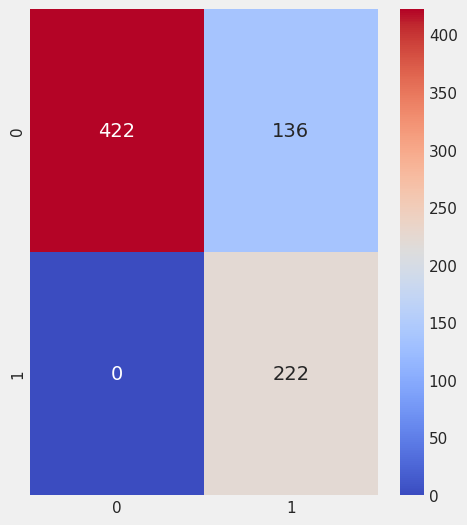

In [ ]:
evaluation(X_test,logis_model,y_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.71      0.99      0.83       558
           1       0.00      0.00      0.00       222

    accuracy                           0.71       780
   macro avg       0.36      0.50      0.42       780
weighted avg       0.51      0.71      0.59       780

F1_score
0.0
ACCURACY
71.15 %
confusion matrix:
 [[555   3]
 [222   0]]


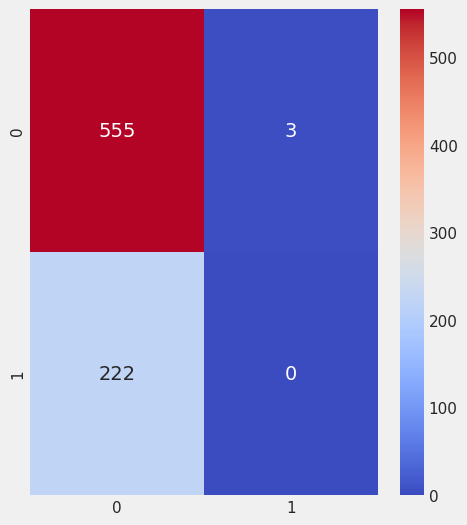

In [ ]:
evaluation(X_test,knn_model,y_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       558
           1       0.62      1.00      0.77       222

    accuracy                           0.83       780
   macro avg       0.81      0.88      0.81       780
weighted avg       0.89      0.83      0.83       780

F1_score
76.55
ACCURACY
82.56 %
confusion matrix:
 [[422 136]
 [  0 222]]


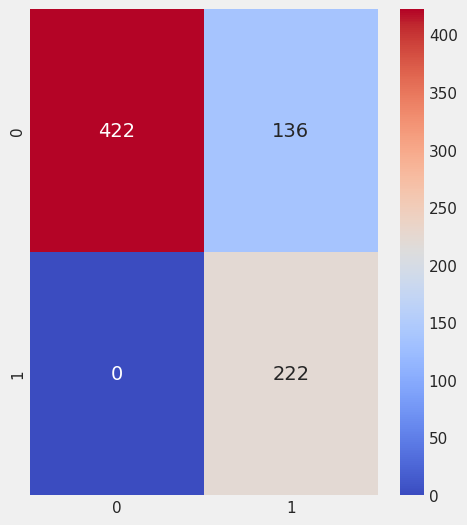

In [ ]:
evaluation(X_test,nb_model,y_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.72      1.00      0.83       558
           1       0.00      0.00      0.00       222

    accuracy                           0.72       780
   macro avg       0.36      0.50      0.42       780
weighted avg       0.51      0.72      0.60       780

F1_score
0.0
ACCURACY
71.54 %
confusion matrix:
 [[558   0]
 [222   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


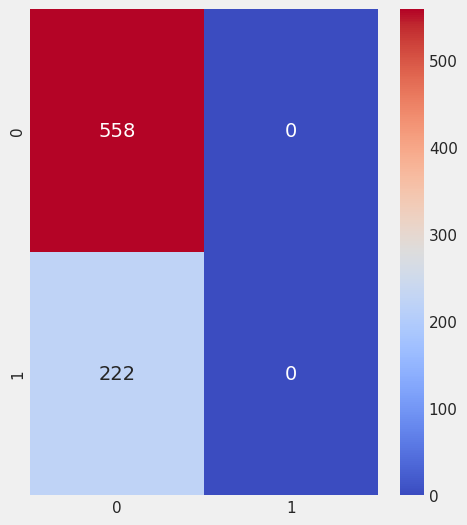

In [ ]:
evaluation(X_test,svc_model,y_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       558
           1       0.62      1.00      0.77       222

    accuracy                           0.83       780
   macro avg       0.81      0.88      0.81       780
weighted avg       0.89      0.83      0.83       780

F1_score
76.55
ACCURACY
82.56 %
confusion matrix:
 [[422 136]
 [  0 222]]


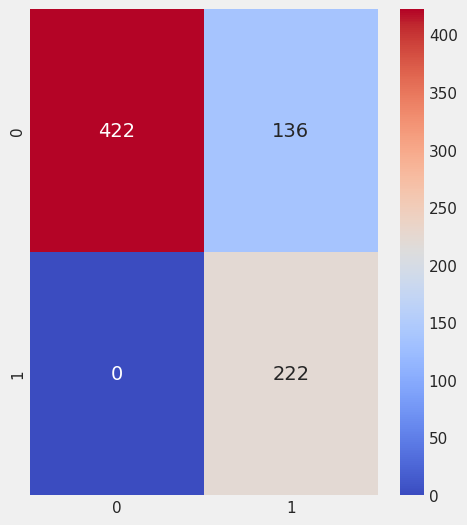

In [ ]:
evaluation(X_test,tree_model,y_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.99      0.76      0.86       558
           1       0.62      0.98      0.76       222

    accuracy                           0.82       780
   macro avg       0.80      0.87      0.81       780
weighted avg       0.88      0.82      0.83       780

F1_score
75.87
ACCURACY
82.31 %
confusion matrix:
 [[425 133]
 [  5 217]]


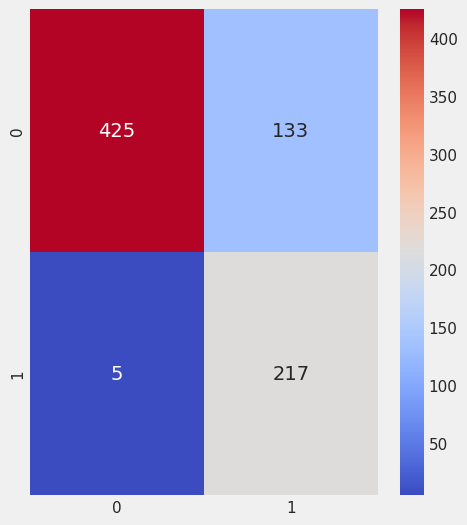

In [ ]:
evaluation(X_test,forest_model,y_test)

# Feature Engineering( tìm phân khúc bằng k-meam)

In [ ]:
data

Customer ID  Age  Gender Item_Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase_Amount_USD       Location Size      Color  Season  \
0                      53       Kentucky    L       Gray  Winter   
1                      64          Maine    L     Maroon  Winter   
2                      73  Massachusetts    S     Maroon  Spring   
3                      90   Rhode Island    M     Maroon  Spring   
4                      49         Oregon    M  Turquoise  Spring   
...                   ...            ...  ...        ...     ...   
3895                   28       Virginia    L  Turquoise  Summer   
3896                   49           Iowa    L      White  Spring   
3897                   33     New Jersey    L      Green  Spring   
3898                   77      Minnesota    S      Brown  Summer   
3899                   81     California    M      Beige  Spring   

      Review_Rating Subscription_Status   Shipping_Type Discount_Applied  \
0               3.1                 Yes         Express              Yes   
1               3.1                 Yes         Express              Yes   
2               3.1                 Yes   Free Shipping              Yes   
3               3.5                 Yes    Next Day Air              Yes   
4               2.7                 Yes   Free Shipping              Yes   
...             ...                 ...             ...              ...   
3895            4.2                  No  2-Day Shipping               No   
3896            4.5                  No    Store Pickup               No   
3897            2.9                  No        Standard               No   
3898            3.8                  No         Express               No   
3899            3.1                  No    Store Pickup               No   

     Promo_Code_Used  Previous_Purchases Payment_Method Frequency_of_Purchases  
0                Yes                  14          Venmo            Fortnightly  
1                Yes                   2           Cash            Fortnightly  
2                Yes                  23    Credit Card                 Weekly  
3                Yes                  49         PayPal                 Weekly  
4                Yes                  31         PayPal               Annually  
...              ...                 ...            ...                    ...  
3895              No                  32          Venmo                 Weekly  
3896              No                  41  Bank Transfer              Bi-Weekly  
3897              No                  24          Venmo              Quarterly  
3898              No                  24          Venmo                 Weekly  
3899              No                  33          Venmo              Quarterly  

[3900 rows x 18 columns]

#Calculate RFM and RFM_Score

In [ ]:
def Recency	 (Previous_Purchases):
    if Previous_Purchases<=10:
        return 1
    elif Previous_Purchases>10 and Previous_Purchases<=20:
        return 2
    elif Previous_Purchases>20 and Previous_Purchases<=30:
        return 3
    elif Previous_Purchases>30 and Previous_Purchases<=40:
        return 4
    else:
        return 5

In [ ]:
data['Recency'] = data['Previous_Purchases'].apply(Recency)



In [ ]:
def Frequency (Frequency_of_Purchases):
    if Frequency_of_Purchases=='Weekly':
        return 5
    elif Frequency_of_Purchases=='Fortnightly' or 'Bi-Weekly':
        return 4
    elif Frequency_of_Purchases=='Monthly':
        return 3
    elif Frequency_of_Purchases=='Quarterly' or 'Every 3 Months':
        return 2
    else:
        return 1

In [ ]:
data['Frequency'] = data['Frequency_of_Purchases'].apply(Frequency)

In [ ]:
data.head()

Customer ID  Age Gender Item_Purchased  Category  Purchase_Amount_USD  \
0            1   55   Male         Blouse  Clothing                   53   
1            2   19   Male        Sweater  Clothing                   64   
2            3   50   Male          Jeans  Clothing                   73   
3            4   21   Male        Sandals  Footwear                   90   
4            5   45   Male         Blouse  Clothing                   49   

        Location Size      Color  Season  Review_Rating Subscription_Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping_Type Discount_Applied Promo_Code_Used  Previous_Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment_Method Frequency_of_Purchases  Recency  Frequency  
0          Venmo            Fortnightly        2          4  
1           Cash            Fortnightly        1          4  
2    Credit Card                 Weekly        3          5  
3         PayPal                 Weekly        5          5  
4         PayPal               Annually        4          4

In [ ]:
data.Purchase_Amount_USD.value_counts()

94     62
32     62
36     62
51     61
90     60
       ..
100    36
87     35
49     35
69     34
61     33
Name: Purchase_Amount_USD, Length: 81, dtype: int64

In [ ]:
data['Purchase_Amount_USD'].min()

20

In [ ]:
data['Purchase_Amount_USD'].max()

100

In [ ]:
def monetary (Purchase_Amount_USD):
    if Purchase_Amount_USD<=35:
        return 1
    elif Purchase_Amount_USD>35 and Purchase_Amount_USD<=50:
        return 2
    elif Purchase_Amount_USD>50 and Purchase_Amount_USD<=75:
        return 3
    elif Purchase_Amount_USD>75 and Purchase_Amount_USD<=90:
        return 4
    else:
        return 5

In [ ]:
data['Monetary'] = data['Purchase_Amount_USD'].apply(monetary)

In [ ]:
data.head()

Customer ID  Age Gender Item_Purchased  Category  Purchase_Amount_USD  \
0            1   55   Male         Blouse  Clothing                   53   
1            2   19   Male        Sweater  Clothing                   64   
2            3   50   Male          Jeans  Clothing                   73   
3            4   21   Male        Sandals  Footwear                   90   
4            5   45   Male         Blouse  Clothing                   49   

        Location Size      Color  Season  ...  Subscription_Status  \
0       Kentucky    L       Gray  Winter  ...                  Yes   
1          Maine    L     Maroon  Winter  ...                  Yes   
2  Massachusetts    S     Maroon  Spring  ...                  Yes   
3   Rhode Island    M     Maroon  Spring  ...                  Yes   
4         Oregon    M  Turquoise  Spring  ...                  Yes   

   Shipping_Type Discount_Applied Promo_Code_Used Previous_Purchases  \
0        Express              Yes             Yes                 14   
1        Express              Yes             Yes                  2   
2  Free Shipping              Yes             Yes                 23   
3   Next Day Air              Yes             Yes                 49   
4  Free Shipping              Yes             Yes                 31   

   Payment_Method Frequency_of_Purchases Recency  Frequency  Monetary  
0           Venmo            Fortnightly       2          4         3  
1            Cash            Fortnightly       1          4         3  
2     Credit Card                 Weekly       3          5         3  
3          PayPal                 Weekly       5          5         4  
4          PayPal               Annually       4          4         2  

[5 rows x 21 columns]

In [ ]:
rfm_data= data[['Customer ID','Recency','Frequency','Monetary']]

In [ ]:
rfm_data.head()


Customer ID  Recency  Frequency  Monetary
0            1        2          4         3
1            2        1          4         3
2            3        3          5         3
3            4        5          5         4
4            5        4          4         2

# Training


In [ ]:
!pip install kneed

In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Calculating RFM score
rfm_data['RFM_Score'] = 0.15*rfm_data['Recency'] + 0.28*rfm_data['Frequency'] + 0.57*rfm_data['Monetary']
rfm_df = rfm_data.round(2)
rfm_df[['Customer ID', 'RFM_Score']].head(7)

<ipython-input-400-a8ab34cd3d05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_data['RFM_Score'] = 0.15*rfm_data['Recency'] + 0.28*rfm_data['Frequency'] + 0.57*rfm_data['Monetary']


Customer ID  RFM_Score
0            1       3.13
1            2       2.98
2            3       3.56
3            4       4.43
4            5       2.86
5            6       2.27
6            7       4.15

In [ ]:
rfm_df['RFM_Score'].min()

1.84

In [ ]:
rfm_df['RFM_Score'].max()

5.0

In [ ]:
# Rating Customer based upon the RFM score
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] > 4.5, "Top Customers",
									(np.where(rfm_df['RFM_Score'] > 4, "High value Customer",
										(np.where(rfm_df['RFM_Score'] > 3, "Medium Value Customer",
							np.where(rfm_df['RFM_Score'] > 2, 'Low Value Customers', 'Lost Customers'))))))
rfm_df[['Customer ID', 'RFM_Score', 'Customer_segment']].head(20)


Customer ID  RFM_Score       Customer_segment
0             1       3.13  Medium Value Customer
1             2       2.98    Low Value Customers
2             3       3.56  Medium Value Customer
3             4       4.43    High value Customer
4             5       2.86    Low Value Customers
5             6       2.27    Low Value Customers
6             7       4.15    High value Customer
7             8       2.27    Low Value Customers
8             9       4.12    High value Customer
9            10       1.84         Lost Customers
10           11       2.14    Low Value Customers
11           12       2.98    Low Value Customers
12           13       3.43  Medium Value Customer
13           14       3.71  Medium Value Customer
14           15       3.71  Medium Value Customer
15           16       3.55  Medium Value Customer
16           17       3.01  Medium Value Customer
17           18       2.86    Low Value Customers
18           19       2.84    Low Value Customers
19           20       4.15    High value Customer

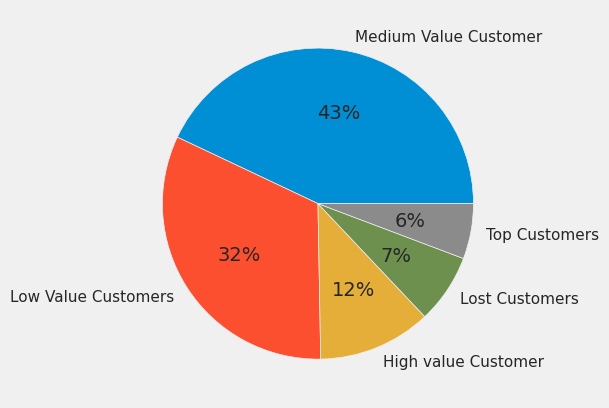

In [ ]:
# Visualizing customer segments
plt.pie(rfm_df.Customer_segment.value_counts(),
		labels=rfm_df.Customer_segment.value_counts().index,
		autopct='%.0f%%')
plt.show()


đây là cách truyền thống

# cách K-Mean

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [ ]:
data2=data[['Previous_Purchases','Frequency','Purchase_Amount_USD']]
data2.rename(columns={'Purchase_Amount_USD':'monetary','Previous_Purchases':'recency','Frequency':'frequency'},inplace=True)

<ipython-input-440-376ab2ffebbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.rename(columns={'Purchase_Amount_USD':'monetary','Previous_Purchases':'recency','Frequency':'frequency'},inplace=True)


In [ ]:
data2

recency  frequency  monetary
0          14          4        53
1           2          4        64
2          23          5        73
3          49          5        90
4          31          4        49
...       ...        ...       ...
3895       32          5        28
3896       41          4        49
3897       24          4        33
3898       24          5        77
3899       33          4        81

[3900 rows x 3 columns]

In [ ]:
X = data2.iloc[:].values
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data3 = scaler.fit_transform(X)

In [ ]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
 kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
 kmeans.fit(data3)
 sse.append(kmeans.inertia_)

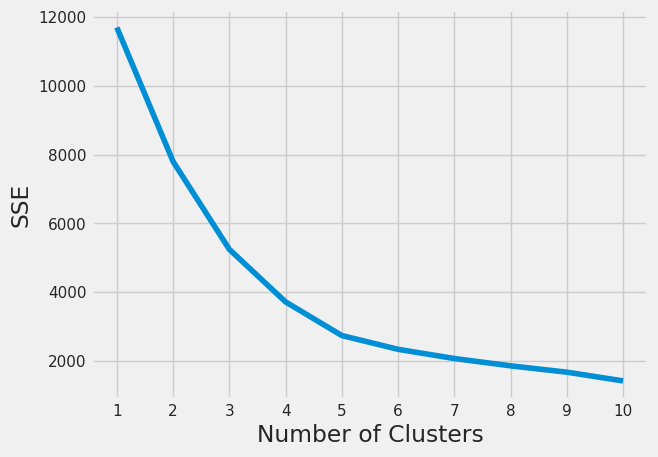

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:

kl = KneeLocator(range(1,11),sse,curve= 'convex',direction='decreasing')
kl.elbow

4

In [ ]:
silhoutte_coef = []
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,**kmeans_kwargs)
  kmeans.fit(data3)
  score= silhouette_score(data3,kmeans.labels_)
  silhoutte_coef.append(score)


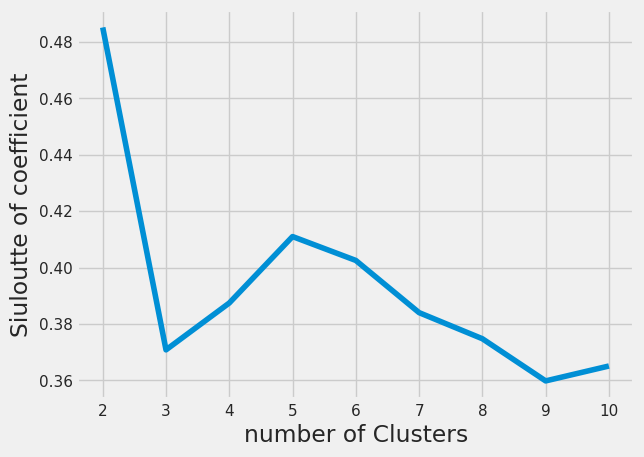

In [ ]:
plt.style.use('fivethirtyeight')
plt.plot(range(2,11),silhoutte_coef)
plt.xticks(range(2,11))
plt.xlabel('number of Clusters')
plt.ylabel('Siuloutte of coefficient')
plt.show()

In [ ]:
# test t = 4
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


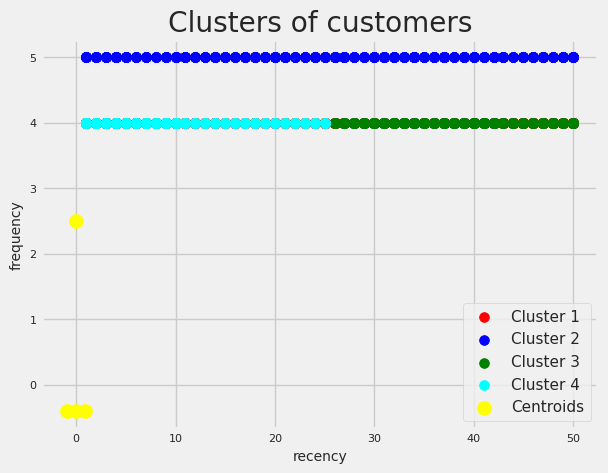

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('recency',fontsize=10)
plt.ylabel('frequency',fontsize=10)
plt.tick_params(labelsize = 8)
plt.legend()
plt.show()

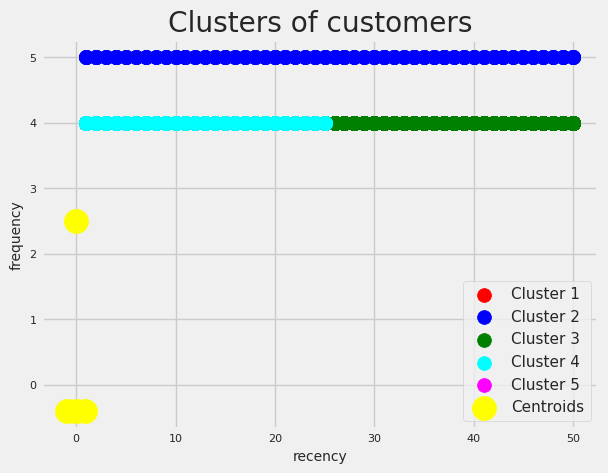

In [ ]:
#test k=5
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('recency',fontsize=10)
plt.ylabel('frequency',fontsize=10)
plt.tick_params(labelsize = 8)
plt.legend()
plt.show()

chọn k=5

In [ ]:
data2

recency  frequency  monetary
0          14          4        53
1           2          4        64
2          23          5        73
3          49          5        90
4          31          4        49
...       ...        ...       ...
3895       32          5        28
3896       41          4        49
3897       24          4        33
3898       24          5        77
3899       33          4        81

[3900 rows x 3 columns]

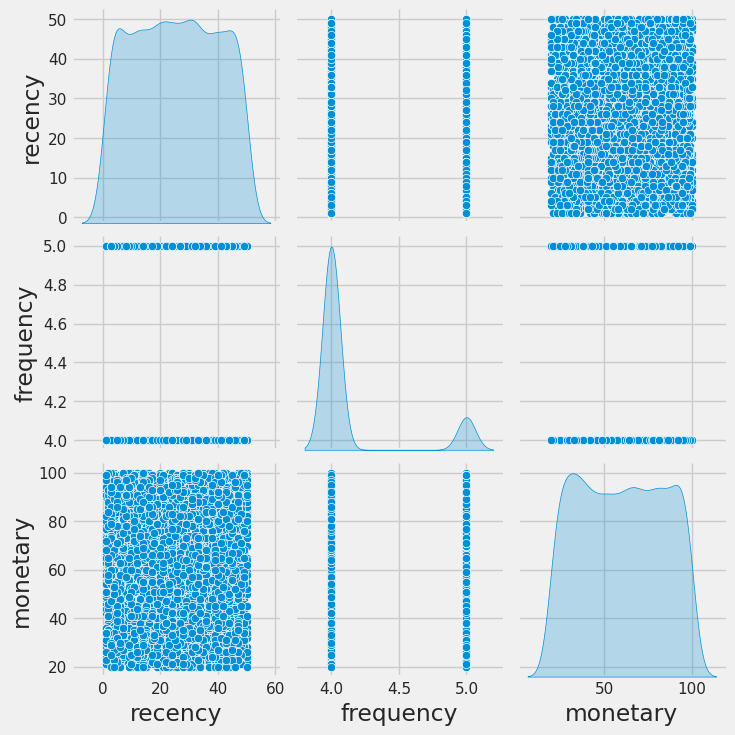

In [ ]:
sns.pairplot(data2, diag_kind='kde')

In [ ]:
from sklearn.cluster import KMeans

#  t = 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
#labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_kmeans

array([4, 2, 2, ..., 0, 2, 1], dtype=int32)

In [ ]:
data2['Cluster']=y_kmeans

<ipython-input-455-75a2da8654ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Cluster']=y_kmeans


In [ ]:
data2

recency  frequency  monetary  Cluster
0          14          4        53        4
1           2          4        64        2
2          23          5        73        2
3          49          5        90        1
4          31          4        49        3
...       ...        ...       ...      ...
3895       32          5        28        0
3896       41          4        49        3
3897       24          4        33        0
3898       24          5        77        2
3899       33          4        81        1

[3900 rows x 4 columns]

In [ ]:
d = {'recency':'Avg_Recency', 'frequency':'AVG_Frequency', 'monetary':'AVG_Monetary'}
df_RFM_mean = data2.groupby('Cluster').agg({'recency':'mean', 'frequency':'mean','monetary': 'mean'}).rename(columns=d)


In [ ]:
df_RFM_mean

Avg_Recency  AVG_Frequency  AVG_Monetary
Cluster                                          
0          36.497948       4.153215     32.213406
1          37.721311       4.131148     88.101341
2          11.332108       4.133578     81.975490
3          33.595438       4.138055     60.577431
4          11.363958       4.135453     38.944641

In [ ]:
data2.groupby('Cluster').agg(['max','min'])['recency']

max  min
Cluster          
0         50   20
1         50   23
2         26    1
3         50   13
4         26    1

In [ ]:
data2.groupby('Cluster').agg(['max','min'])['frequency']

max  min
Cluster          
0          5    4
1          5    4
2          5    4
3          5    4
4          5    4

In [ ]:
data2.groupby('Cluster').agg(['max','min'])['monetary']

max  min
Cluster          
0         47   20
1        100   73
2        100   61
3         75   46
4         60   20

In [ ]:

data2['segment'] = data2['Cluster'].replace(to_replace=[0,1,2,3,4], value = ['Lost Value Customer', 'High Customer', 'Top Value Customer', 'Low Value Customer','Medium Customers'])

<ipython-input-462-84e98ac8c4da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['segment'] = data2['Cluster'].replace(to_replace=[0,1,2,3,4], value = ['Lost Value Customer', 'High Customer', 'Top Value Customer', 'Low Value Customer','Medium Customers'])


In [ ]:
data2

recency  frequency  monetary  Cluster              segment
0          14          4        53        4     Medium Customers
1           2          4        64        2   Top Value Customer
2          23          5        73        2   Top Value Customer
3          49          5        90        1        High Customer
4          31          4        49        3   Low Value Customer
...       ...        ...       ...      ...                  ...
3895       32          5        28        0  Lost Value Customer
3896       41          4        49        3   Low Value Customer
3897       24          4        33        0  Lost Value Customer
3898       24          5        77        2   Top Value Customer
3899       33          4        81        1        High Customer

[3900 rows x 5 columns]

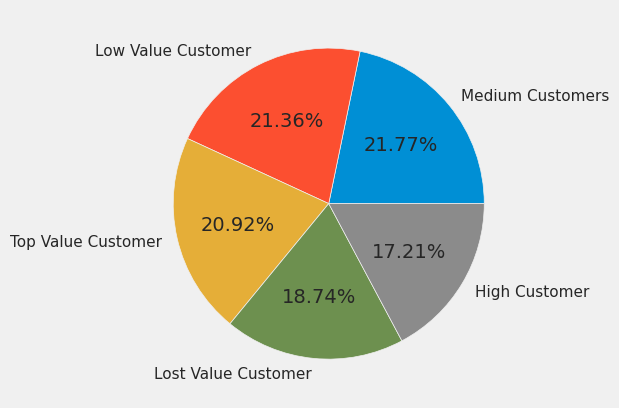

In [ ]:
# Visualizing customer segments
plt.pie(data2.segment.value_counts(),
		labels=data2.segment.value_counts().index,
		autopct='%.2f%%')
plt.tick_params(labelsize = 8)
plt.show()

# Tổng hợp đánh giá

In [ ]:

data

Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts    S     Maroon  Spring   
3                        90   Rhode Island    M     Maroon  Spring   
4                        49         Oregon    M  Turquoise  Spring   
...                     ...            ...  ...        ...     ...   
3895                     28       Virginia    L  Turquoise  Summer   
3896                     49           Iowa    L      White  Spring   
3897                     33     New Jersey    L      Green  Spring   
3898                     77      Minnesota    S      Brown  Summer   
3899                     81     California    M      Beige  Spring   

      Review Rating Subscription Status   Shipping Type Discount Applied  \
0               3.1                 Yes         Express              Yes   
1               3.1                 Yes         Express              Yes   
2               3.1                 Yes   Free Shipping              Yes   
3               3.5                 Yes    Next Day Air              Yes   
4               2.7                 Yes   Free Shipping              Yes   
...             ...                 ...             ...              ...   
3895            4.2                  No  2-Day Shipping               No   
3896            4.5                  No    Store Pickup               No   
3897            2.9                  No        Standard               No   
3898            3.8                  No         Express               No   
3899            3.1                  No    Store Pickup               No   

     Promo Code Used  Previous Purchases Payment Method Frequency of Purchases  
0                Yes                  14          Venmo            Fortnightly  
1                Yes                   2           Cash            Fortnightly  
2                Yes                  23    Credit Card                 Weekly  
3                Yes                  49         PayPal                 Weekly  
4                Yes                  31         PayPal               Annually  
...              ...                 ...            ...                    ...  
3895              No                  32          Venmo                 Weekly  
3896              No                  41  Bank Transfer              Bi-Weekly  
3897              No                  24          Venmo              Quarterly  
3898              No                  24          Venmo                 Weekly  
3899              No                  33          Venmo              Quarterly  

[3900 rows x 18 columns]

In [ ]:
data2['Subscription_Status']=data['Subscription_Status']
data2['Discount_Applied']= data['Discount_Applied']

<ipython-input-473-7260e3900518>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Subscription_Status']=data['Subscription_Status']
<ipython-input-473-7260e3900518>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Discount_Applied']= data['Discount_Applied']


In [ ]:
data2

recency  frequency  monetary  Cluster              segment  \
0          14          4        53        4     Medium Customers   
1           2          4        64        2   Top Value Customer   
2          23          5        73        2   Top Value Customer   
3          49          5        90        1        High Customer   
4          31          4        49        3   Low Value Customer   
...       ...        ...       ...      ...                  ...   
3895       32          5        28        0  Lost Value Customer   
3896       41          4        49        3   Low Value Customer   
3897       24          4        33        0  Lost Value Customer   
3898       24          5        77        2   Top Value Customer   
3899       33          4        81        1        High Customer   

     Subscription_Status Discount_Applied  
0                    Yes              Yes  
1                    Yes              Yes  
2                    Yes              Yes  
3                    Yes              Yes  
4                    Yes              Yes  
...                  ...              ...  
3895                  No               No  
3896                  No               No  
3897                  No               No  
3898                  No               No  
3899                  No               No  

[3900 rows x 7 columns]

In [ ]:
#lọc Subscription_Status có giá trị Yes nhóm theo clusters
result1=data2[data2['Subscription_Status'] == 'Yes'].groupby('Cluster').agg({
    'Cluster': 'count',
})
result1 = result1.rename(columns={'Cluster': 'counts'})
result1

counts
Cluster        
0           216
1           192
2           210
3           224
4           211

In [ ]:
#lọc Subscription_Status có giá trị No nhóm theo clusters
result2=data2[data2['Subscription_Status'] == 'No'].groupby('Cluster').agg({
    'Cluster': 'count',
})
result2 = result2.rename(columns={'Cluster': 'counts'})
result2

counts
Cluster        
0           515
1           479
2           606
3           609
4           638

In [ ]:
# #lọc Discount_Applied có giá trị No nhóm theo  clusters
result3=data2[data2['Discount_Applied'] == 'No'].groupby('Cluster').agg({
    'Cluster': 'count'
})
result3 = result3.rename(columns={'Cluster': 'counts'})
result3

counts
Cluster        
0           397
1           383
2           473
3           473
4           497

In [ ]:
# #lọc Discount_Applied có giá trị Yes nhóm theo  clusters
result4=data2[data2['Discount_Applied'] == 'Yes'].groupby('Cluster').agg({
    'Cluster': 'count'
})
result4 = result4.rename(columns={'Cluster': 'counts'})
result4

counts
Cluster        
0           334
1           288
2           343
3           360
4           352

In [ ]:
#Có bao nhiêu khách hàng đã mua hàng ở mỗi danh mục?
purchase_count_by_category = data['Category'].value_counts()
print("Purchase Count by Category:")
print(purchase_count_by_category)

Purchase Count by Category:
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64


In [ ]:
common_category_low_rating_male = data[(data['Gender'] == 'Male') & (data['Review_Rating'] < 3)]['Category'].mode()[0]
print("Danh mục phổ biến nhất dành cho khách hàng nam có xếp hạng thấp :", common_category_low_rating_male)

Danh mục phổ biến nhất dành cho khách hàng nam có xếp hạng thấp : Clothing


In [ ]:
common_category_low_rating_male = data[(data['Gender'] == 'Male') & (data['Review_Rating'] > 3)]['Category'].mode()[0]
print("Danh mục phổ biến nhất dành cho khách hàng nam có xếp hạng cao :", common_category_low_rating_male)

Danh mục phổ biến nhất dành cho khách hàng nam có xếp hạng cao : Clothing


In [ ]:
subscription_promo_count = data[(data['Subscription_Status'] == 'Yes') & (data['Promo_Code_Used'] == 'Yes')]['Customer ID'].count()
print("khách hàng có trạng thái đăng ký là 'Có' và đã sử dụng mã khuyến mãi để mua hàng: ", subscription_promo_count)

khách hàng có trạng thái đăng ký là 'Có' và đã sử dụng mã khuyến mãi để mua hàng:  1053


In [ ]:
subscription_promo_count = data[(data['Subscription_Status'] == 'No') & (data['Promo_Code_Used'] == 'No')]['Customer ID'].count()
print("khách hàng có trạng thái đăng ký là 'không' và có sử dụng mã khuyến mãi để mua hàng: ", subscription_promo_count)

khách hàng có trạng thái đăng ký là 'không' và có sử dụng mã khuyến mãi để mua hàng:  2223


1. xem xét tình hình hoạt động của doanh nghiệp
từ khám phá ban đầu dữ liệu ta tổng hợp được các thông tin sau :

  - tỉ lệ người đăng kí dịch vụ mua hàng thấp rất chiếm 27% so với 73%  những người không đăng kí mua hàng
  - lượng không đăng kí mua rất nhiều và nhóm nữ không có đăng kí dịch vụ mua hàng
  - khách hàng nam chiếm 68% so với khách hàng nữ
  - khách hàng  không sử dụng dịch vụ khuyến mãi cao hơn với người dùng dịch vụ
  - Danh mục phổ biến nhất dành cho khách hàng nam có xếp hạng thấp : Clothing
  - Danh mục phổ biến nhất dành cho khách hàng nam có xếp hạng cao : Clothing
  - khách hàng có trạng thái đăng ký là 'Có' và đã sử dụng mã khuyến mãi để mua hàng:  1053
  - khách hàng có trạng thái đăng ký là 'không' và có sử dụng mã khuyến mãi để mua hàng:  2223
  - độ tuổi trung bình của những người đăng kí là 45 so với 44 của những người không đăng kí dịch vụ mua hàng

--> từ những tổng ta có những kết luận là :

  -  doanh nghiệp đã không hoạt động tốt trong việc chăm sóc các khách hàng cũ là khách hàng đăng ký dịch vụ mua hàng và các khách hàng mới là các khách hàng không đăng kí dịch vụ
  -  sử dụng các dịch vụ khuyến mãi không hiệu quả. không đúng với các đối tượng cần chăm sóc là các nhóm khách hàng đăng kí dịch vụ và nhóm khách hàng chủ yếu	Medium Value Customer(tiêu dùng trung bình từ 60 USD) và nhóm Top Value (trung bình 80 USD)

--> giải pháp:

   - từ những dữ liệu trên ta có thể đề xuất các biện pháp chăm sóc hiệu quả bằng cách chia 2 loại khuyến mãi : đối với nhóm khách hàng không đăng kí dịch vụ chỉ khuyến mãi các dịch vụ giảm giá thấp từ 5% trở xuống và đối với nhóm đăng kí dịch vụ ta có thể khuyến mãi các dịch vụ giảm giá từ 10% trở đi và các hoạt động giảm giá cao hơn trong các dịp lễ cũng áp dụng cho các
   - khách hàng đăng kí dịch vụ  nhóm Medium Value Custome và Top Value nên ta có thể kinh doanh nhiều các mặt hàng sản phẩm phù hợp  2 nhóm khách hàng mục tiêu nhiều hơn nhằm đa dạng hoá kiểu dáng và mẫu mã kích thích nhu cầu mua sắm đối với nhóm khách hàng này
   - nhóm khách hàng chủ yếu là lớp trung niên từ 44 tuôi nên các mặt hàng thời trang hợp với tuổi tác và khí hậu mối vùng
  